In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
#Se declaran los listas necesarias para almacenar los datos de los diferentes csv para poder crear un único dataset unificado
com_autonoma = []
años = []
trimestres = []
tipo_delito = []
tipos_subdelito = []
cantidad = []

In [ ]:
# Se leen los datasets uno por uno a medida que se van subiendo al directorio de colab
df = pd.read_csv('2024_1 - copia.csv')

In [ ]:
#Lista de delitos
delitos_list = ["    1.-DELITOS Y FALTAS (EU)"]
#Lista de comunidades autonomas
comunidades_list = ["TOTAL NACIONAL", "ANDALUCIA", "ARAGON", "ASTURIAS (PRINCIPADO DE)", "BALEARS (ILLES)", "CANARIAS", "CANTABRIA", "CASTILLA Y LEON", "CASTILLA - LA MANCHA", "CATALUNA", "COMUNITAT VALENCIANA", "EXTREMADURA", "GALICIA", "MADRID (COMUNIDAD DE)", "MURCIA (REGION DE)", "NAVARRA (COMUNIDAD FORAL DE)", "PAIS VASCO", "RIOJA (LA)", "CIUDAD AUTONOMA DE CEUTA", "CIUDAD AUTONOMA DE MELILLA", "EXTRANJERA", "FUERA DE ESPANA", "EN EL EXTRANJERO"]
comunidad_target = "";

#Obtengo el año y el trimestre

trimestre = 0;

if df.columns[1][:-5] == 'Enero-marzo' or df.columns[1][:-5] == 'enero-marzo':
  trimestre = 1;
elif df.columns[1][:-5] == 'Enero-junio' or df.columns[1][:-5] == 'enero-junio':
  trimestre = 2;
elif df.columns[1][:-5] == 'Enero-Septiembre' or df.columns[1][:-5] == 'enero-septiembre' or df.columns[1][:-5] == 'Enero-septiembre':
  trimestre = 3;
elif df.columns[1][:-5] == 'Enero-Diciembre' or df.columns[1][:-5] == 'enero-diciembre' or df.columns[1][:-5] == 'Enero-diciembre':
  trimestre = 4;

año = df.columns[1][-4:]

print(trimestre)
print(año)

# Iterar sobre las filas usando iloc para poder identificar los diferentes delitos. Una vez identificado el delito y extraído la comunidad autónoma, inserto los datos en las lsitas declaradas anteriormente.
for i in range(len(df)):
  if df.iloc[i][0] in comunidades_list:
    comunidad_target = df.iloc[i][0]
  else:
    if df.iloc[i][0] == "    1.-DELITOS Y FALTAS (EU)":
      tipo_delito.append("DELITOS")
      tipos_subdelito.append("-")
    elif df.iloc[i][0] == "    3.-Delitos graves y menos graves de lesiones y rina tumultuaria" or df.iloc[i][0] == "    3. Delitos graves y menos graves de lesiones y rina tumultuaria":
      tipo_delito.append("DELITOS")
      tipos_subdelito.append("GRAVES Y MENOS GRAVES")
    elif df.iloc[i][0] == "    5.-Delitos contra la libertad e indemnidad sexual" or df.iloc[i][0] == "    5. Delitos contra la libertad e indemnidad sexual":
      tipo_delito.append("DELITOS")
      tipos_subdelito.append("LIBERTAD E INDEMNIDAD SEXUAL")
    elif df.iloc[i][0] == "    4.-Secuestro" or df.iloc[i][0] == "    4. Secuestro":
      tipo_delito.append("SECUESTRO")
      tipos_subdelito.append("-")
    elif (df.iloc[i][0] == "    2.-HOMICIDIOS DOLOSOS Y ASESINATOS CONSUMADOS (EU)" or df.iloc[i][0] == "    1.-Homicidios dolosos y asesinatos consumados" or df.iloc[i][0] == "    1. Homicidios dolosos y asesinatos consumados"):
      tipo_delito.append("HOMICIDIOS")
      tipos_subdelito.append("DOLOSOS Y ASESINATOS CONSUMADOS")
    elif (df.iloc[i][0] == "    2.-Homicidios dolosos y asesinatos en grado tentativa" or df.iloc[i][0] == "    2. Homicidios dolosos y asesinatos en grado tentativa"):
      tipo_delito.append("HOMICIDIOS")
      tipos_subdelito.append("DOLOSOS Y ASESINATOS TENTATIVOS")
    elif (df.iloc[i][0] == "    3.-ROBO CON VIOLENCIA E INTIMIDACION (EU)" or df.iloc[i][0] == "    6.-Robos con violencia e intimidacion" or df.iloc[i][0] == "    6. Robos con violencia e intimidacion"):
      tipo_delito.append("ROBOS")
      tipos_subdelito.append("VIOLENCIA E INTIMIDACION")
    elif df.iloc[i][0] == "    4.-ROBOS CON FUERZA EN DOMICILIOS (EU)" or df.iloc[i][0] == "    7.-Robos con fuerza en domicilios establecimientos y otras instalaciones" or df.iloc[i][0] == "    7. Robos con fuerza en domicilios establecimientos y otras instalaciones":
      tipo_delito.append("ROBOS")
      tipos_subdelito.append("FUERZA")
    elif df.iloc[i][0] == "    5.-SUSTRACCION VEHICULOS A MOTOR (EU)" or df.iloc[i][0] == "    9.-Sustracciones de vehiculos" or df.iloc[i][0] == "    9. Sustracciones de vehiculos":
      tipo_delito.append("SUSTRACCION")
      tipos_subdelito.append("VEHICULOS")
    elif df.iloc[i][0] == "    6.-TRAFICO DE DROGAS (EU)" or df.iloc[i][0] == "    10.-Trafico de drogas" or df.iloc[i][0] == "    10. Trafico de drogas":
      tipo_delito.append("TRAFICO")
      tipos_subdelito.append("DROGAS")
    elif df.iloc[i][0] == "    7.-DANOS":
      tipo_delito.append("DANOS")
      tipos_subdelito.append("-")
    elif df.iloc[i][0] == "    8.-HURTOS" or df.iloc[i][0] == "    8.-Hurtos" or df.iloc[i][0] == "    8. Hurtos":
      tipo_delito.append("HURTOS")
      tipos_subdelito.append("-")
    elif df.iloc[i][0] == "    12. Estafas informaticas" or df.iloc[i][0] == "    12.-Estafas informaticas":
      tipo_delito.append("CIBERDELITO")
      tipos_subdelito.append("ESTAFAS INFORMATICAS")
    elif df.iloc[i][0] == "    13. Otros ciberdelitos" or df.iloc[i][0] == "    13.-Otros ciberdelitos":
      tipo_delito.append("CIBERDELITO")
      tipos_subdelito.append("OTROS")
    elif df.iloc[i][0] == "    11. Resto de criminalidad convencional" or df.iloc[i][0] == "    11.-Resto de criminalidad convencional" or df.iloc[i][0] == "    Resto de infracciones penales":
      tipo_delito.append("RESTO CRIMINALIDAD CONVENCIONAL")
      tipos_subdelito.append("-")
    else:
      continue
    cantidad.append(df.iloc[i][1])
    com_autonoma.append(comunidad_target)
    años.append(año)
    trimestres.append(trimestre)

In [ ]:
# Se procede a la creación del dataset unificado como un dataframe de pandas
df_definitivo = pd.DataFrame({
    'Comunidad': com_autonoma,
    'Año': años,
    'Trimestre': trimestres,
    'Delito': tipo_delito,
    'Subdelito': tipos_subdelito,
    'Cantidad': cantidad,
})

In [ ]:
# Se muestra el dataset definitivo
df_definitivo

In [25]:
# Una vez se ha cosneguido unificar el dataset este se almacena en un fichero csv para no tener que repetir la operación anteiror
df_definitivo.to_csv('dbb.csv', index = False)

In [3]:
# Se lee el dataset definitivo y se almacena en la variable df_definitivo
df_definitivo = pd.read_csv('dbb.csv')

Analisis descriptivo

In [4]:
# Se unifican los valores del extranjero mediante un replace
df_definitivo['Comunidad'] = df_definitivo['Comunidad'].replace('FUERA DE ESPANA', 'EN EL EXTRANJERO')
df_definitivo['Comunidad'] = df_definitivo['Comunidad'].replace('EXTRANJERA', 'EN EL EXTRANJERO')

In [18]:
# El metodo describe, muestra información relevante acerca del dataset, como el máximo el mínimo o la media.
df_definitivo.describe()

,Año,Trimestre,Cantidad
count,7098.000000,7098.000000,7.098000e+03
mean,2018.715976,2.508876,1.120120e+04
std,2.248586,1.120721,6.502473e+04
min,2015.000000,1.000000,0.000000e+00
25%,2017.000000,2.000000,2.700000e+01
50%,2019.000000,3.000000,2.950000e+02
75%,2021.000000,4.000000,2.604750e+03
max,2022.000000,4.000000,2.036815e+06


In [ ]:
# Se analizan de que tipo son los diferentes atributos del dataset
print(df_definitivo.dtypes)

Comunidad     object
Año            int64
Trimestre      int64
Delito        object
Subdelito     object
Cantidad     float64
dtype: object


In [ ]:
# Se printa el resultado total de delitos registrados
sum(df_definitivo['Cantidad'])

79506112.0

Valores nulos

<Axes: >

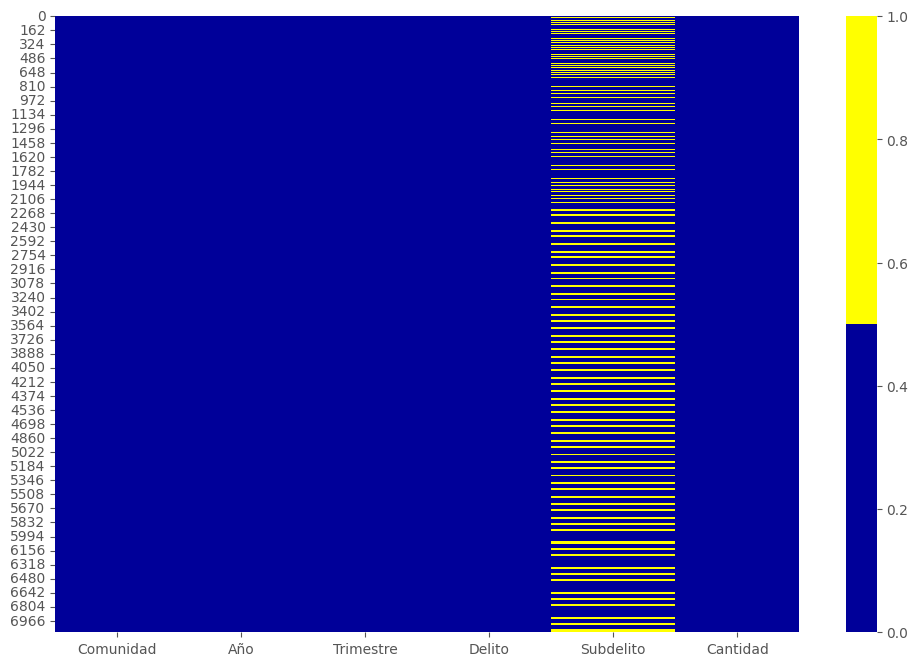

In [ ]:
import seaborn as sns

# Con este heatmap se intentan buscar los valores nulos representados mediante el valor '-'. El valor azul indica que es diferente de nulo, y el amarillo representa nulo.
cols = df_definitivo.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df_definitivo[cols] == '-', cmap=sns.color_palette(colours))

<Axes: >

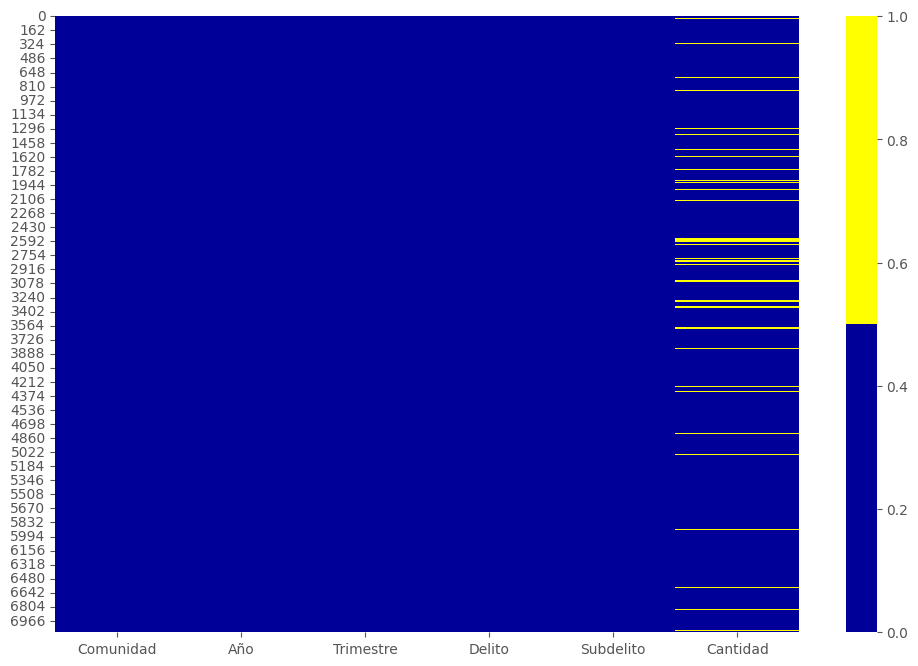

In [ ]:
df_definitivo_null = df_definitivo.replace(0.0, np.nan)
# Con este heatmap se intentan buscar los valores nulos representados mediante el valor '0'. El valor azul indica que es diferente de nulo, y el amarillo representa nulo.
cols = df_definitivo_null.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df_definitivo_null[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
import numpy as np

# Se buscan de los nulos con valor '0' de forma numérica mediante un porcentaje respecto al total.
for col in df_definitivo_null.columns:
    pct_missing = np.mean(df_definitivo_null[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Comunidad - 0%
Año - 0%
Trimestre - 0%
Delito - 0%
Subdelito - 0%
Cantidad - 5%


In [ ]:
# Se buscan de los nulos con valor '-' de forma numérica mediante un porcentaje respecto al total.
for col in df_definitivo.columns:
    pct_missing = np.mean(df_definitivo[col] == '-')
    print('{} - {}%'.format(col, round(pct_missing*100)))

Comunidad - 0%
Año - 0%
Trimestre - 0%
Delito - 0%
Subdelito - 26%
Cantidad - 0%


Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 [Text(1, 0, 'ANDALUCIA'),
  Text(2, 0, 'ARAGON'),
  Text(3, 0, 'ASTURIAS (PRINCIPADO DE)'),
  Text(4, 0, 'BALEARS (ILLES)'),
  Text(5, 0, 'CANARIAS'),
  Text(6, 0, 'CANTABRIA'),
  Text(7, 0, 'CASTILLA - LA MANCHA'),
  Text(8, 0, 'CASTILLA Y LEON'),
  Text(9, 0, 'CATALUNA'),
  Text(10, 0, 'CIUDAD AUTONOMA DE CEUTA'),
  Text(11, 0, 'CIUDAD AUTONOMA DE MELILLA'),
  Text(12, 0, 'COMUNITAT VALENCIANA'),
  Text(13, 0, 'EN EL EXTRANJERO'),
  Text(14, 0, 'EXTRANJERA'),
  Text(15, 0, 'EXTREMADURA'),
  Text(16, 0, 'FUERA DE ESPANA'),
  Text(17, 0, 'GALICIA'),
  Text(18, 0, 'MADRID (COMUNIDAD DE)'),
  Text(19, 0, 'MURCIA (REGION DE)'),
  Text(20, 0, 'NAVARRA (COMUNIDAD FORAL DE)'),
  Text(21, 0, 'PAIS VASCO'),
  Text(22, 0, 'RIOJA (LA)')])

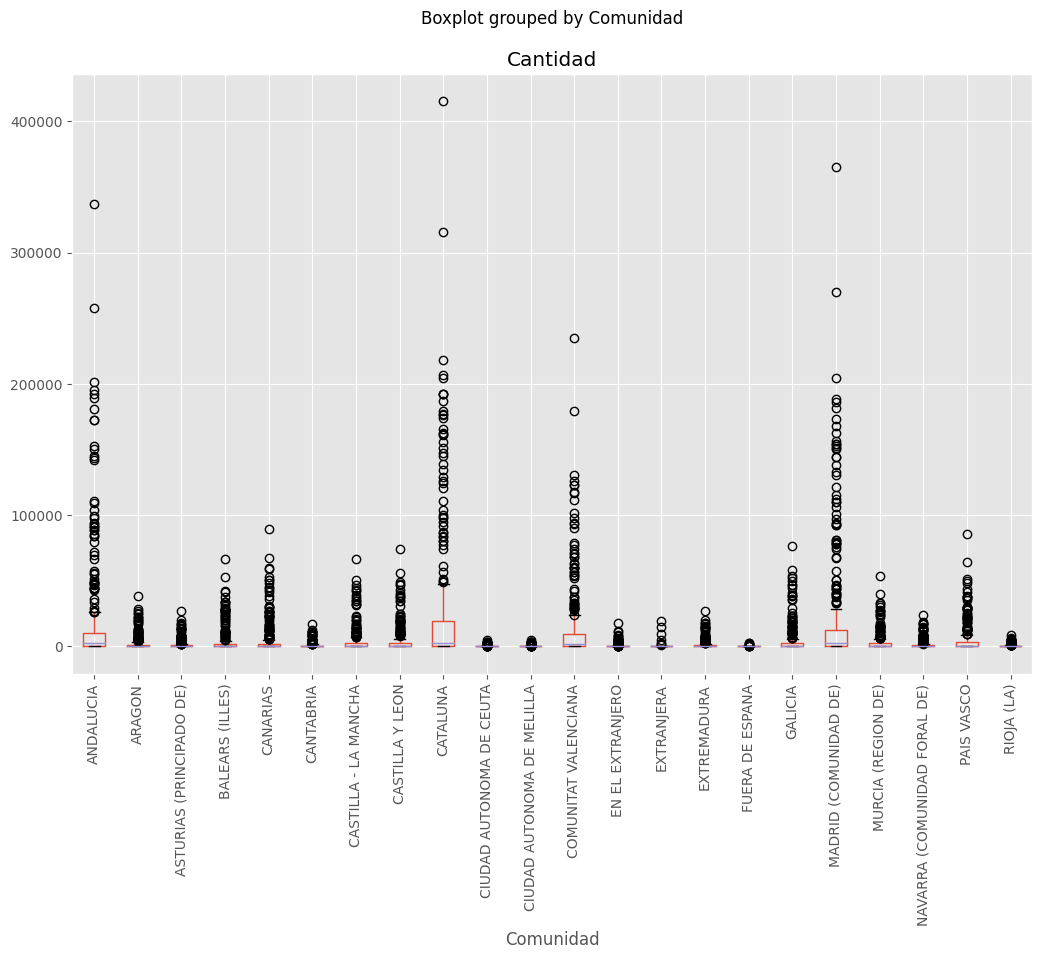

In [ ]:
# Box plot para poder visualizar los valores atípicos de cada comunidad autónoma.

df_sin_total_nacional = df_definitivo[df_definitivo['Comunidad'] != 'TOTAL NACIONAL']

df_sin_total_nacional.boxplot(column=['Cantidad'], by='Comunidad')
plt.xticks(rotation=90)

Descripción de la muestra

Text(0, 0.5, 'Número de instancias')

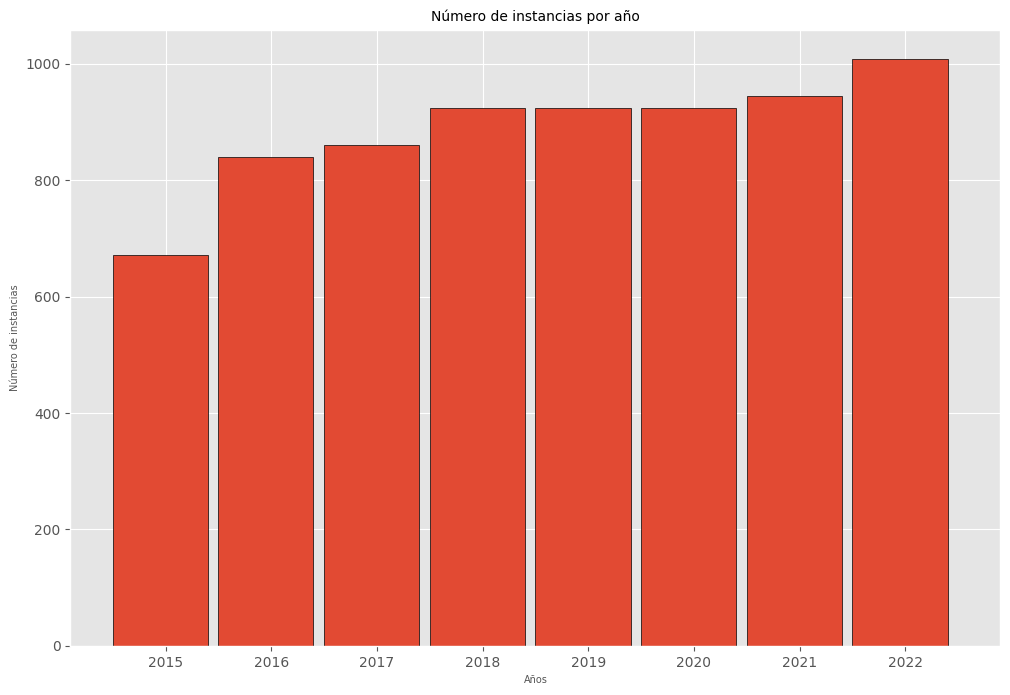

In [19]:
# Histogram del número de instancias por año.
bins = np.arange(2015 - 0.5, 2022 + 1.5, 1)
plt.hist(df_definitivo['Año'], bins=bins, align='mid', edgecolor='black', width=0.9)
plt.title("Número de instancias por año", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de instancias", fontsize=7)

Text(0, 0.5, 'Número de instancias')

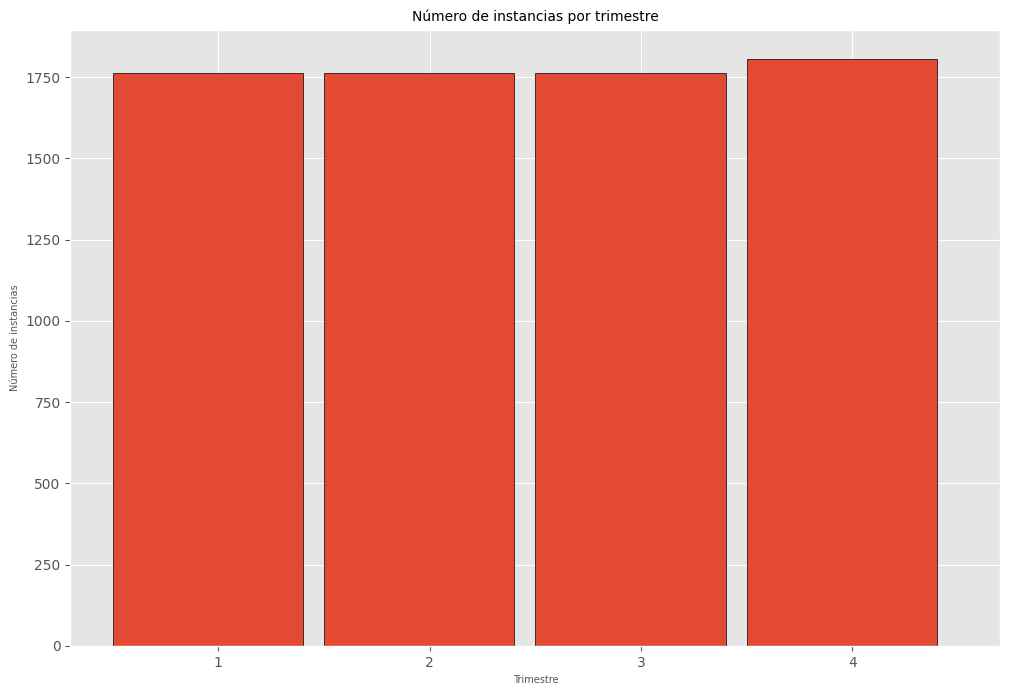

In [20]:
# Histograma del numero de instancias por trimestre
bins = np.arange(1 - 0.5, 4 + 1.5, 1)
plt.hist(df_definitivo['Trimestre'], bins=bins, align='mid', edgecolor='black', width=0.9)
plt.xticks([1, 2, 3, 4])
plt.title("Número de instancias por trimestre", fontsize=10)
plt.xlabel("Trimestre", fontsize=7)
plt.ylabel("Número de instancias", fontsize=7)

In [ ]:
# Se representa el año y el tipo de delito con más registros
print(df_definitivo.loc[df_definitivo['Cantidad'].idxmax()])

Comunidad    TOTAL NACIONAL
Año                    2015
Trimestre                 4
Delito              DELITOS
Subdelito                 -
Cantidad          2036815.0
Name: 504, dtype: object


In [ ]:
# Se representan las tres instancias con mayores delitos
print(df_definitivo.nlargest(3, 'Cantidad'))

           Comunidad   Año  Trimestre                           Delito  \
504   TOTAL NACIONAL  2015          4                          DELITOS   
336   TOTAL NACIONAL  2015          3                          DELITOS   
4000  TOTAL NACIONAL  2019          4  RESTO CRIMINALIDAD CONVENCIONAL   

     Subdelito   Cantidad  
504          -  2036815.0  
336          -  1542066.0  
4000         -  1202265.0  


In [ ]:
# Se representa las tres instancias con mayores delitos (sin tener en cuenta el total nacional)
print(df_definitivo[df_definitivo['Comunidad'] != 'TOTAL NACIONAL'].nlargest(3, 'Cantidad'))

                 Comunidad   Año  Trimestre   Delito Subdelito  Cantidad
576               CATALUNA  2015          4  DELITOS         -  415464.0
608  MADRID (COMUNIDAD DE)  2015          4  DELITOS         -  365006.0
512              ANDALUCIA  2015          4  DELITOS         -  337124.0


In [ ]:
#Se representan los diferentes ciberdelitos.
print(df_definitivo[df_definitivo['Delito']=='CIBERDELITO'])

                       Comunidad   Año  Trimestre       Delito  \
5848              TOTAL NACIONAL  2021          4  CIBERDELITO   
5849              TOTAL NACIONAL  2021          4  CIBERDELITO   
5860                   ANDALUCIA  2021          4  CIBERDELITO   
5861                   ANDALUCIA  2021          4  CIBERDELITO   
5872                      ARAGON  2021          4  CIBERDELITO   
...                          ...   ...        ...          ...   
7073    CIUDAD AUTONOMA DE CEUTA  2022          4  CIBERDELITO   
7084  CIUDAD AUTONOMA DE MELILLA  2022          4  CIBERDELITO   
7085  CIUDAD AUTONOMA DE MELILLA  2022          4  CIBERDELITO   
7096            EN EL EXTRANJERO  2022          4  CIBERDELITO   
7097            EN EL EXTRANJERO  2022          4  CIBERDELITO   

                 Subdelito  Cantidad  
5848  ESTAFAS INFORMATICAS  192375.0  
5849                 OTROS   25927.0  
5860  ESTAFAS INFORMATICAS   23237.0  
5861                 OTROS    5418.0  
5872  ESTAFA

In [ ]:
# Se representa todos los delitos de la comunidad de Andalucia en el año 2017
print(df_definitivo[(df_definitivo['Comunidad']=='ANDALUCIA') & (df_definitivo['Año']==2017)])

      Comunidad   Año  Trimestre                           Delito  \
1522  ANDALUCIA  2017          1                       HOMICIDIOS   
1523  ANDALUCIA  2017          1                       HOMICIDIOS   
1524  ANDALUCIA  2017          1                          DELITOS   
1525  ANDALUCIA  2017          1                        SECUESTRO   
1526  ANDALUCIA  2017          1                          DELITOS   
1527  ANDALUCIA  2017          1                            ROBOS   
1528  ANDALUCIA  2017          1                            ROBOS   
1529  ANDALUCIA  2017          1                           HURTOS   
1530  ANDALUCIA  2017          1                      SUSTRACCION   
1531  ANDALUCIA  2017          1                          TRAFICO   
1732  ANDALUCIA  2017          2                       HOMICIDIOS   
1733  ANDALUCIA  2017          2                       HOMICIDIOS   
1734  ANDALUCIA  2017          2                          DELITOS   
1735  ANDALUCIA  2017          2  

In [ ]:
# Se representa todos los delitos de la comunidad de Andalucia en el año 2017 y en el primer trimestre
print(df_definitivo[(df_definitivo['Comunidad']=='ANDALUCIA') & (df_definitivo['Año']==2017) & (df_definitivo['Trimestre']==1)])

      Comunidad   Año  Trimestre       Delito  \
1522  ANDALUCIA  2017          1   HOMICIDIOS   
1523  ANDALUCIA  2017          1   HOMICIDIOS   
1524  ANDALUCIA  2017          1      DELITOS   
1525  ANDALUCIA  2017          1    SECUESTRO   
1526  ANDALUCIA  2017          1      DELITOS   
1527  ANDALUCIA  2017          1        ROBOS   
1528  ANDALUCIA  2017          1        ROBOS   
1529  ANDALUCIA  2017          1       HURTOS   
1530  ANDALUCIA  2017          1  SUSTRACCION   
1531  ANDALUCIA  2017          1      TRAFICO   

                            Subdelito  Cantidad  
1522  DOLOSOS Y ASESINATOS CONSUMADOS      12.0  
1523  DOLOSOS Y ASESINATOS TENTATIVOS      55.0  
1524            GRAVES Y MENOS GRAVES     679.0  
1525                                -       1.0  
1526     LIBERTAD E INDEMNIDAD SEXUAL     509.0  
1527         VIOLENCIA E INTIMIDACION    1922.0  
1528                           FUERZA    6927.0  
1529                                -   25149.0  
1530      

In [7]:
# Se representa el delito con más cantidad registrado para la comunidad de cataluña
print(df_definitivo[df_definitivo['Comunidad']=='CATALUNA'].nlargest(1, 'Cantidad'))

    Comunidad   Año  Trimestre   Delito Subdelito  Cantidad
576  CATALUNA  2015          4  DELITOS         -  415464.0


In [ ]:
# Se representa los ciberdelitos de la comunidad de Cataluña en el cuarto trimestre
print(df_definitivo[(df_definitivo['Comunidad']=='CATALUNA') & (df_definitivo['Delito']=='CIBERDELITO') & (df_definitivo['Trimestre']==4)])

     Comunidad   Año  Trimestre       Delito             Subdelito  Cantidad
5956  CATALUNA  2021          4  CIBERDELITO  ESTAFAS INFORMATICAS   40016.0
5957  CATALUNA  2021          4  CIBERDELITO                 OTROS    1561.0
6964  CATALUNA  2022          4  CIBERDELITO  ESTAFAS INFORMATICAS   61607.0
6965  CATALUNA  2022          4  CIBERDELITO                 OTROS    2270.0


     Comunidad   Año  Trimestre       Delito             Subdelito  Cantidad
5956  CATALUNA  2021          4  CIBERDELITO  ESTAFAS INFORMATICAS   40016.0
5957  CATALUNA  2021          4  CIBERDELITO                 OTROS    1561.0
6964  CATALUNA  2022          4  CIBERDELITO  ESTAFAS INFORMATICAS   61607.0
6965  CATALUNA  2022          4  CIBERDELITO                 OTROS    2270.0


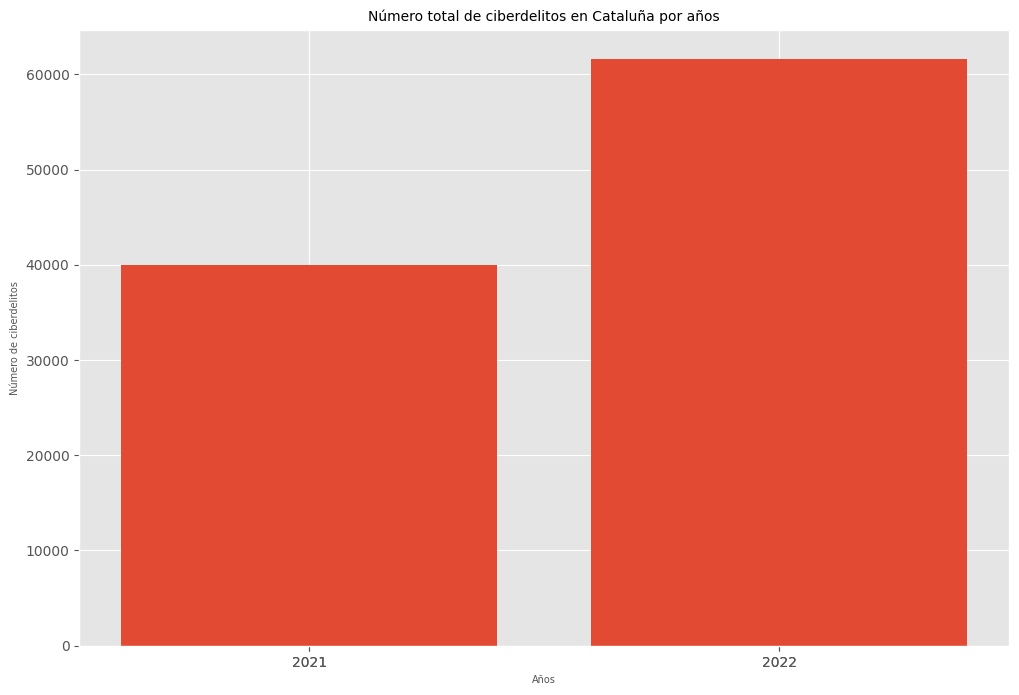

In [ ]:
# Se representan los ciberdelitos de cataluña en el cuarto trimestre
df_cataluña_secuestros = df_definitivo[(df_definitivo['Comunidad']=='CATALUNA') & (df_definitivo['Delito']=='CIBERDELITO') & (df_definitivo['Trimestre']==4)]

print(df_cataluña_secuestros)

plt.bar(df_cataluña_secuestros['Año'], df_cataluña_secuestros['Cantidad'])
plt.xticks(df_cataluña_secuestros['Año'], df_cataluña_secuestros['Año'].astype(int))
plt.title("Número total de ciberdelitos en Cataluña por años", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de ciberdelitos", fontsize=7)
plt.show()

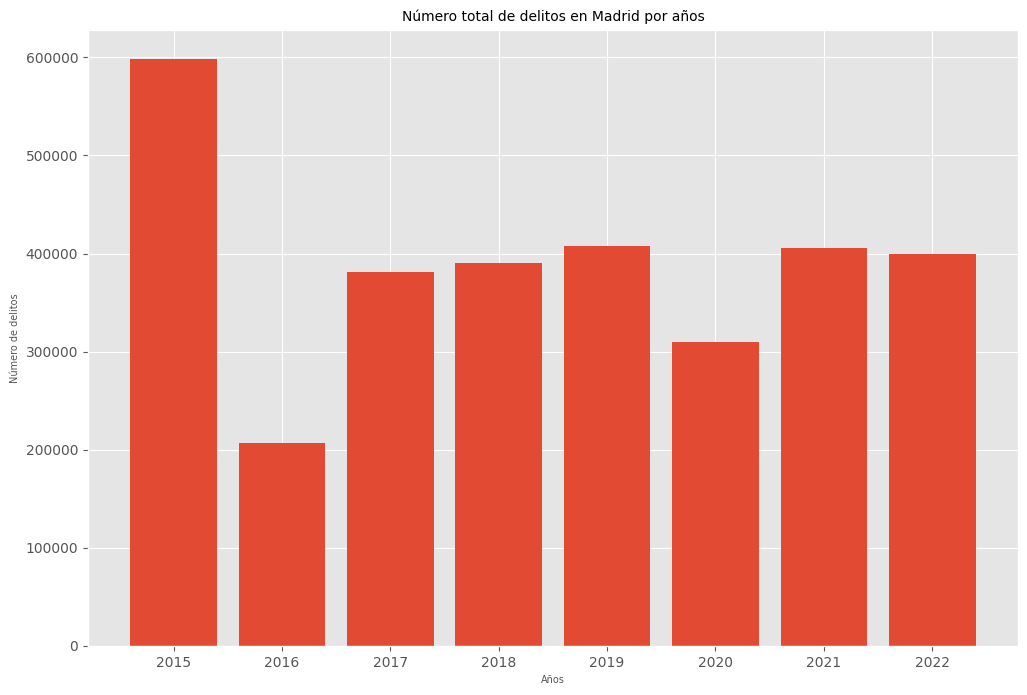

In [ ]:
# Se representa el numero total de delitos en madrid por año mediante un grafico de barras registrados en el cuarto trimestre
df_madrid_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='MADRID (COMUNIDAD DE)') & (df_definitivo['Trimestre']==4)]

df_madrid_delitos_año = df_madrid_delitos_año.groupby('Año')['Cantidad'].sum().reset_index()

plt.bar(df_madrid_delitos_año['Año'], df_madrid_delitos_año['Cantidad'])
plt.xticks(df_madrid_delitos_año['Año'], df_madrid_delitos_año['Año'].astype(int))
plt.title("Número total de delitos en Madrid por años", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

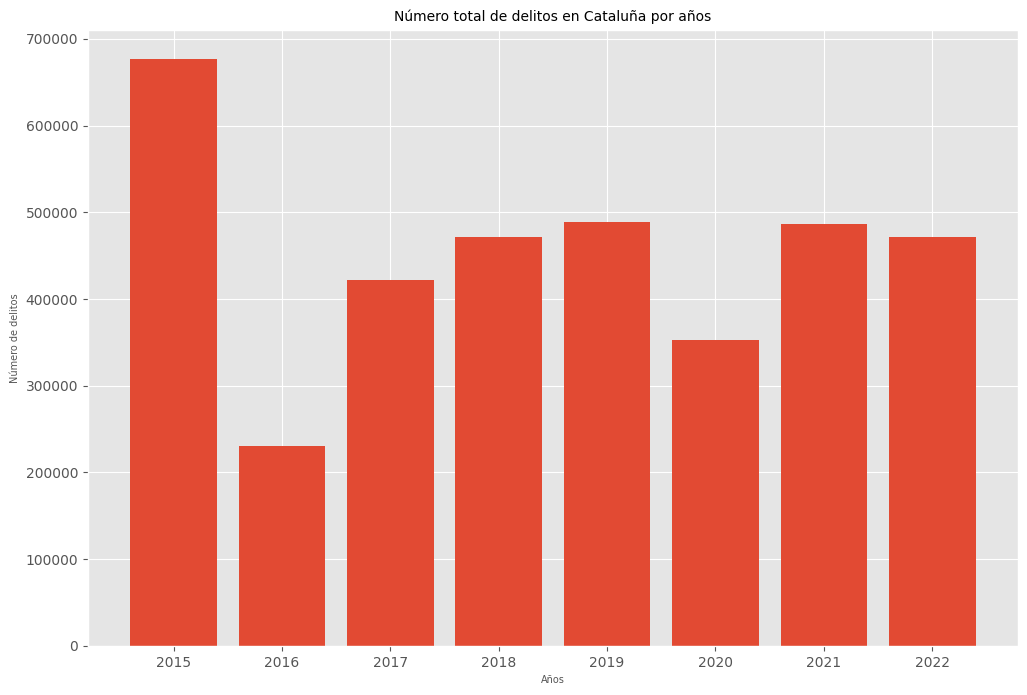

In [ ]:
# Se representa el numero total de delitos en cataluña por año mediante un grafico de barras registrados en el cuarto trimestre
df_cataluña_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='CATALUNA') & (df_definitivo['Trimestre']==4)]

df_cataluña_delitos_año = df_cataluña_delitos_año.groupby('Año')['Cantidad'].sum().reset_index()

plt.bar(df_cataluña_delitos_año['Año'], df_cataluña_delitos_año['Cantidad'])
plt.xticks(df_cataluña_delitos_año['Año'], df_cataluña_delitos_año['Año'].astype(int))
plt.title("Número total de delitos en Cataluña por años", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

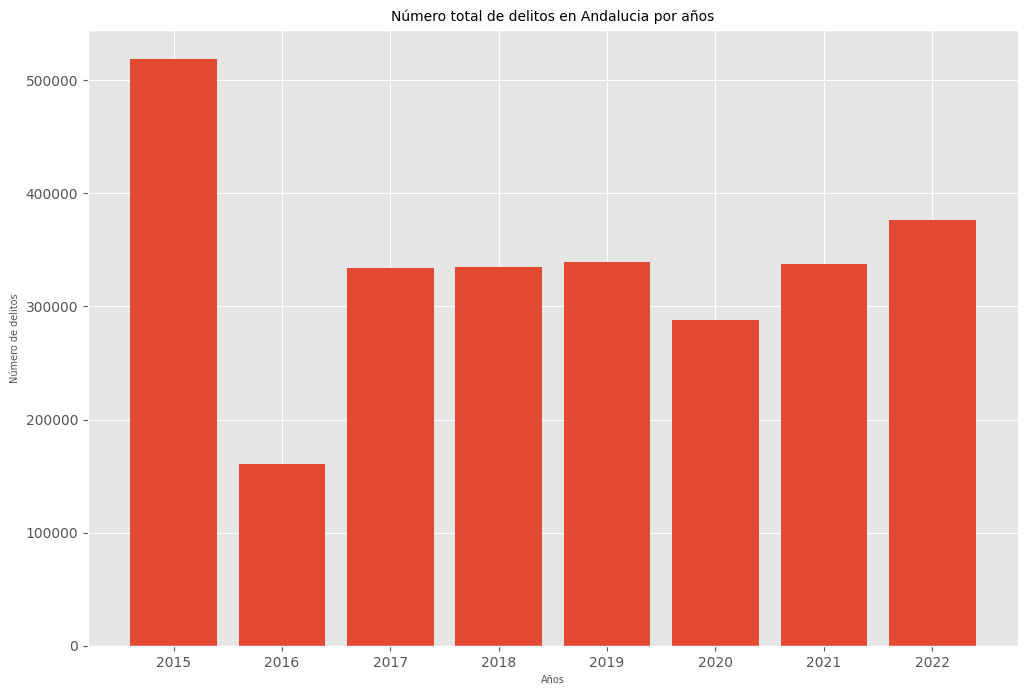

In [ ]:
# Se representa el numero total de delitos en andalucia por año mediante un grafico de barras registrados en el cuarto trimestre
df_andalucia_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='ANDALUCIA') & (df_definitivo['Trimestre']==4)]

df_andalucia_delitos_año = df_andalucia_delitos_año.groupby('Año')['Cantidad'].sum().reset_index()

plt.bar(df_andalucia_delitos_año['Año'], df_andalucia_delitos_año['Cantidad'])
plt.xticks(df_andalucia_delitos_año['Año'], df_andalucia_delitos_año['Año'].astype(int))
plt.title("Número total de delitos en Andalucia por años", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

3203227.0
1020471.0
16858492.0


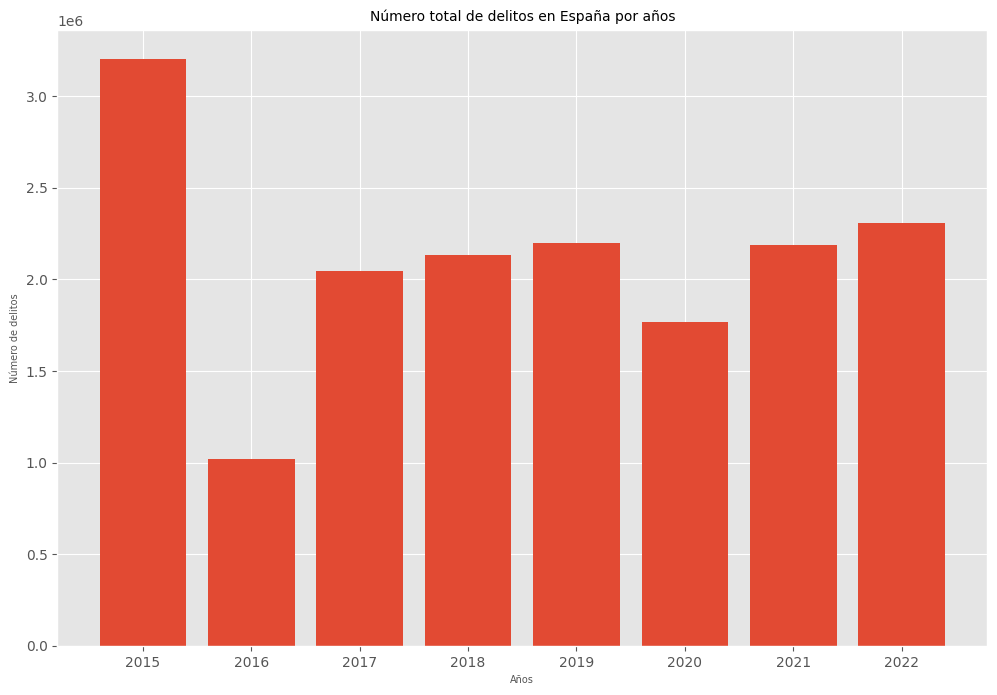

In [ ]:
# Se representa el numero total de delitos en toda españa por año mediante un grafico de barras registrados en el cuarto trimestre
df_nacional_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='TOTAL NACIONAL') & (df_definitivo['Trimestre']==4)]

df_nacional_delitos_año = df_nacional_delitos_año.groupby('Año')['Cantidad'].sum().reset_index()

print(df_nacional_delitos_año['Cantidad'][0])
print(df_nacional_delitos_año['Cantidad'][1])
print(df_nacional_delitos_año['Cantidad'].sum())

plt.bar(df_nacional_delitos_año['Año'], df_nacional_delitos_año['Cantidad'])
plt.xticks(df_nacional_delitos_año['Año'], df_nacional_delitos_año['Año'].astype(int))
plt.title("Número total de delitos en España por años", fontsize=10)
plt.xlabel("Años", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

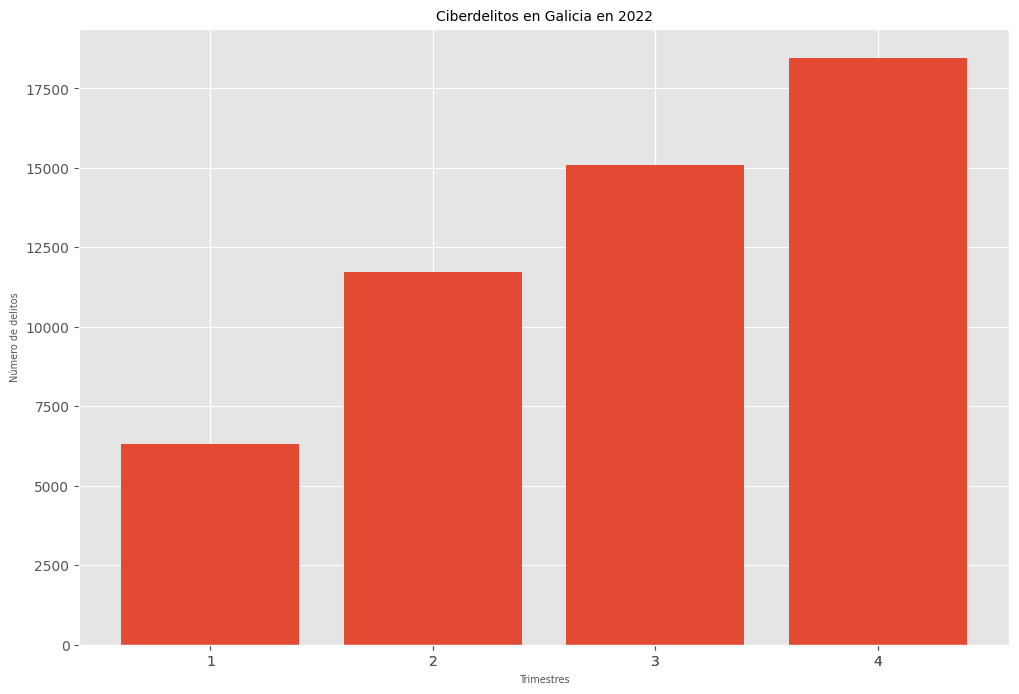

In [ ]:
# Se representa los ciberdelitos de galicia en el año 2022 según el trimestre
df_galicia_ciberdelitos = df_definitivo[(df_definitivo['Comunidad']=='GALICIA') & (df_definitivo['Delito']=='CIBERDELITO') & (df_definitivo['Año']==2022)]

plt.bar(df_galicia_ciberdelitos['Trimestre'], df_galicia_ciberdelitos['Cantidad'])
plt.xticks(df_galicia_ciberdelitos['Trimestre'], df_galicia_ciberdelitos['Trimestre'].astype(int))
plt.title("Ciberdelitos en Galicia en 2022", fontsize=10)
plt.xlabel("Trimestres", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

   Trimestre  Cantidad
0          1   96108.0
1          2  167469.0
2          3  268956.0
3          4  353052.0


<ipython-input-147-61545251b615>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cataluña_ciberdelitos['Cantidad'][3] = df_cataluña_ciberdelitos['Cantidad'][3] - df_cataluña_ciberdelitos['Cantidad'][2]
<ipython-input-147-61545251b615>:9:

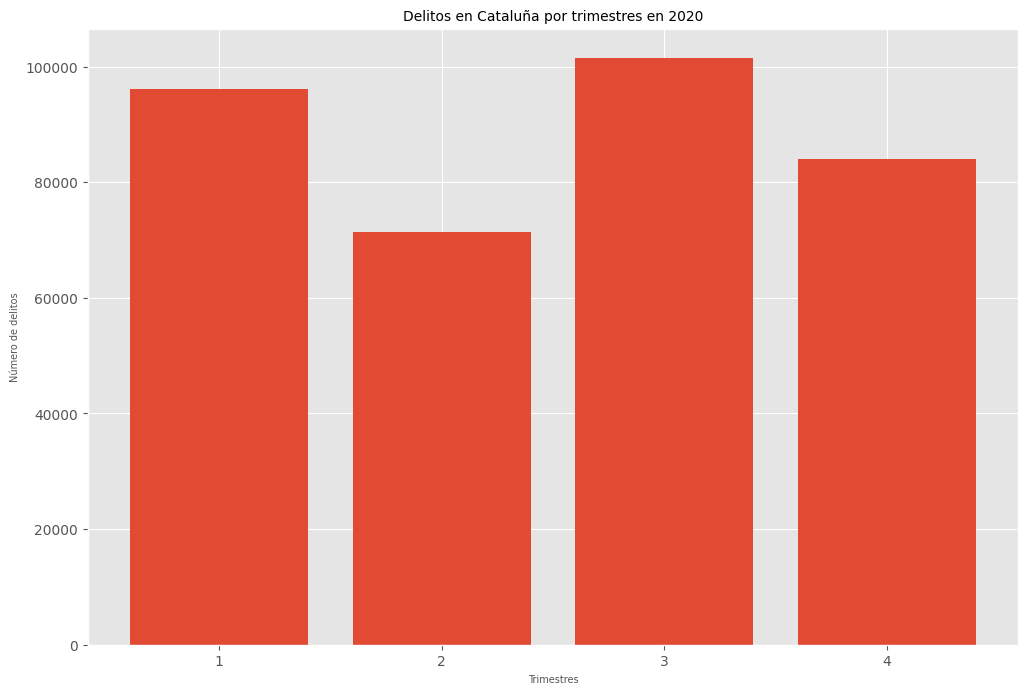

In [ ]:
# Se representa los delitos de Cataluña en el año 2020 según el trimestre
df_cataluña_ciberdelitos = df_definitivo[(df_definitivo['Comunidad']=='CATALUNA') & (df_definitivo['Año']==2020)]

df_cataluña_ciberdelitos = df_cataluña_ciberdelitos.groupby('Trimestre')['Cantidad'].sum().reset_index()

print(df_cataluña_ciberdelitos)

df_cataluña_ciberdelitos['Cantidad'][3] = df_cataluña_ciberdelitos['Cantidad'][3] - df_cataluña_ciberdelitos['Cantidad'][2]
df_cataluña_ciberdelitos['Cantidad'][2] = df_cataluña_ciberdelitos['Cantidad'][2] - df_cataluña_ciberdelitos['Cantidad'][1]
df_cataluña_ciberdelitos['Cantidad'][1] = df_cataluña_ciberdelitos['Cantidad'][1] - df_cataluña_ciberdelitos['Cantidad'][0]

plt.bar(df_cataluña_ciberdelitos['Trimestre'], df_cataluña_ciberdelitos['Cantidad'])
plt.xticks(df_cataluña_ciberdelitos['Trimestre'], df_cataluña_ciberdelitos['Trimestre'].astype(int))
plt.title("Delitos en Cataluña por trimestres en 2020", fontsize=10)
plt.xlabel("Trimestres", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

   Trimestre  Cantidad
0          1   91419.0
1          2  141813.0
2          3  225051.0
3          4  310194.0


<ipython-input-150-0b14ebc68130>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_madrid_ciberdelitos['Cantidad'][3] = df_madrid_ciberdelitos['Cantidad'][3] - df_madrid_ciberdelitos['Cantidad'][2]
<ipython-input-150-0b14ebc68130>:9: Futur

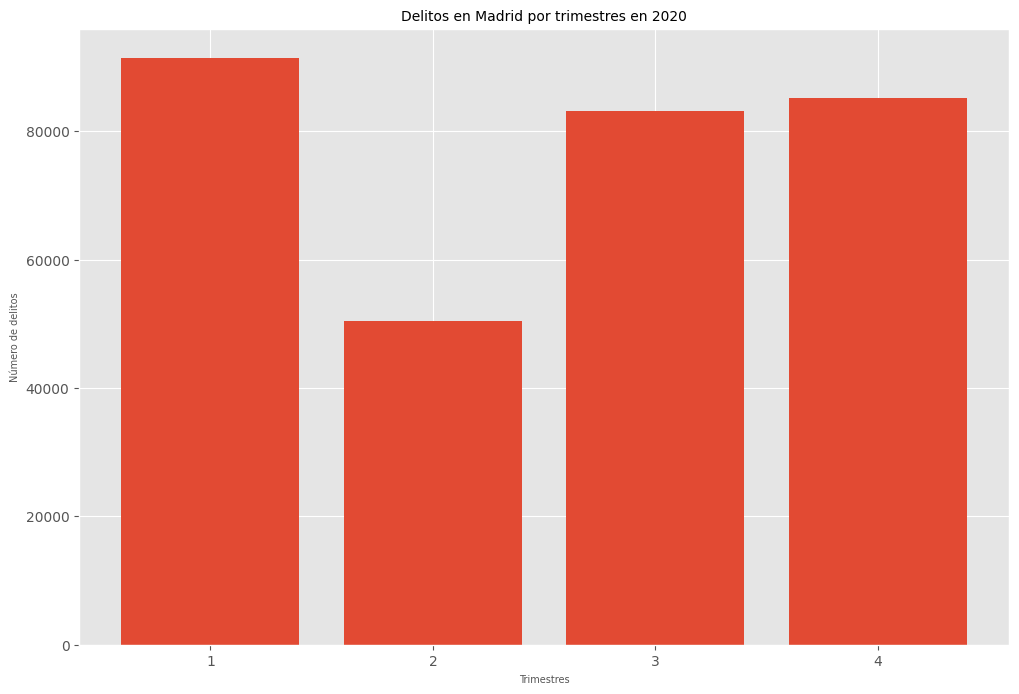

In [ ]:
# Se representa los delitos de Madrid en el año 2020 según el trimestre
df_madrid_ciberdelitos = df_definitivo[(df_definitivo['Comunidad']=='MADRID (COMUNIDAD DE)') & (df_definitivo['Año']==2020)]

df_madrid_ciberdelitos = df_madrid_ciberdelitos.groupby('Trimestre')['Cantidad'].sum().reset_index()

print(df_madrid_ciberdelitos)

df_madrid_ciberdelitos['Cantidad'][3] = df_madrid_ciberdelitos['Cantidad'][3] - df_madrid_ciberdelitos['Cantidad'][2]
df_madrid_ciberdelitos['Cantidad'][2] = df_madrid_ciberdelitos['Cantidad'][2] - df_madrid_ciberdelitos['Cantidad'][1]
df_madrid_ciberdelitos['Cantidad'][1] = df_madrid_ciberdelitos['Cantidad'][1] - df_madrid_ciberdelitos['Cantidad'][0]

plt.bar(df_madrid_ciberdelitos['Trimestre'], df_madrid_ciberdelitos['Cantidad'])
plt.xticks(df_madrid_ciberdelitos['Trimestre'], df_madrid_ciberdelitos['Trimestre'].astype(int))
plt.title("Delitos en Madrid por trimestres en 2020", fontsize=10)
plt.xlabel("Trimestres", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

   Trimestre  Cantidad
0          1   49147.0
1          2   83046.0
2          3  141632.0
3          4  193222.0


<ipython-input-151-7d30b9e8e41a>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_valencia_ciberdelitos['Cantidad'][3] = df_valencia_ciberdelitos['Cantidad'][3] - df_valencia_ciberdelitos['Cantidad'][2]
<ipython-input-151-7d30b9e8e41a>:9:

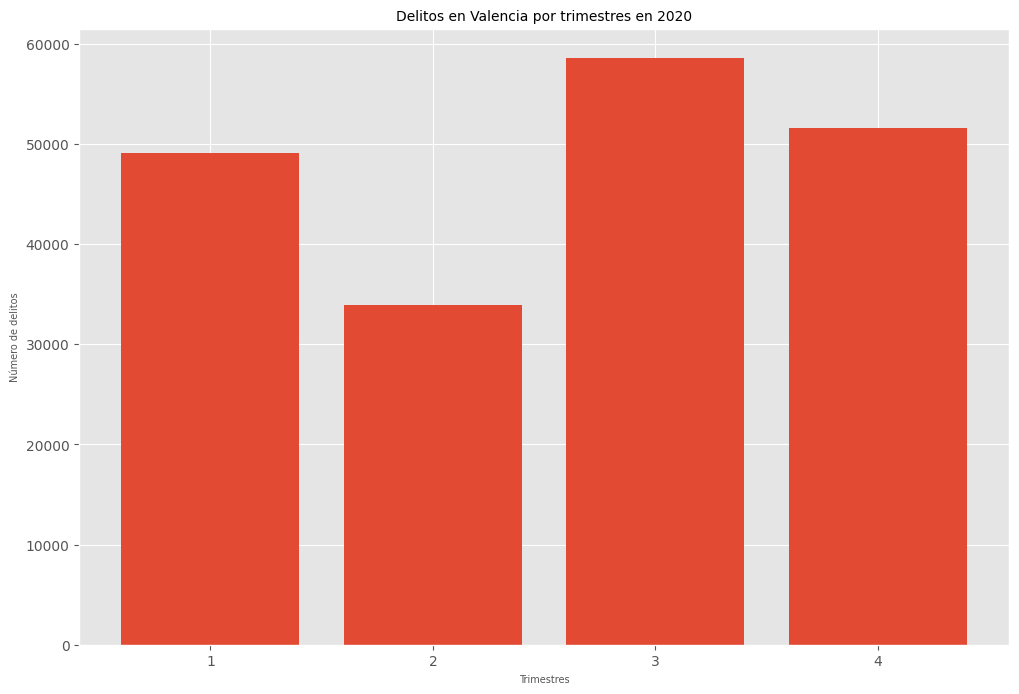

In [ ]:
# Se representa los delitos de Valencia en el año 2020 según el trimestre
df_valencia_ciberdelitos = df_definitivo[(df_definitivo['Comunidad']=='COMUNITAT VALENCIANA') & (df_definitivo['Año']==2020)]

df_valencia_ciberdelitos = df_valencia_ciberdelitos.groupby('Trimestre')['Cantidad'].sum().reset_index()

print(df_valencia_ciberdelitos)

df_valencia_ciberdelitos['Cantidad'][3] = df_valencia_ciberdelitos['Cantidad'][3] - df_valencia_ciberdelitos['Cantidad'][2]
df_valencia_ciberdelitos['Cantidad'][2] = df_valencia_ciberdelitos['Cantidad'][2] - df_valencia_ciberdelitos['Cantidad'][1]
df_valencia_ciberdelitos['Cantidad'][1] = df_valencia_ciberdelitos['Cantidad'][1] - df_valencia_ciberdelitos['Cantidad'][0]

plt.bar(df_valencia_ciberdelitos['Trimestre'], df_valencia_ciberdelitos['Cantidad'])
plt.xticks(df_valencia_ciberdelitos['Trimestre'], df_valencia_ciberdelitos['Trimestre'].astype(int))
plt.title("Delitos en Valencia por trimestres en 2020", fontsize=10)
plt.xlabel("Trimestres", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

   Trimestre  Cantidad
0          1   76122.0
1          2  131799.0
2          3  215964.0
3          4  287594.0


<ipython-input-21-a3b541b78e7a>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_valencia_ciberdelitos['Cantidad'][3] = df_valencia_ciberdelitos['Cantidad'][3] - df_valencia_ciberdelitos['Cantidad'][2]
<ipython-input-21-a3b541b78e7a>:9: F

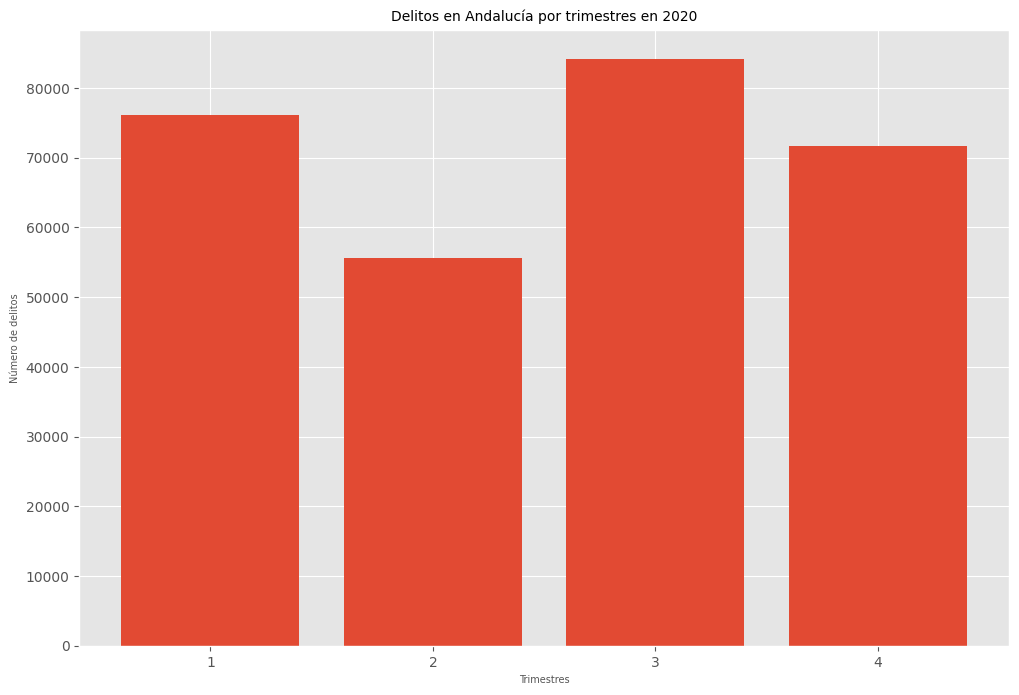

In [21]:
# Se representa los delitos de Andalucia en el año 2020 según el trimestre
df_andalucia_ciberdelitos = df_definitivo[(df_definitivo['Comunidad']=='ANDALUCIA') & (df_definitivo['Año']==2020)]

df_andalucia_ciberdelitos = df_andalucia_ciberdelitos.groupby('Trimestre')['Cantidad'].sum().reset_index()

print(df_andalucia_ciberdelitos)

df_andalucia_ciberdelitos['Cantidad'][3] = df_andalucia_ciberdelitos['Cantidad'][3] - df_andalucia_ciberdelitos['Cantidad'][2]
df_andalucia_ciberdelitos['Cantidad'][2] = df_andalucia_ciberdelitos['Cantidad'][2] - df_andalucia_ciberdelitos['Cantidad'][1]
df_andalucia_ciberdelitos['Cantidad'][1] = df_andalucia_ciberdelitos['Cantidad'][1] - df_andalucia_ciberdelitos['Cantidad'][0]

plt.bar(df_andalucia_ciberdelitos['Trimestre'], df_andalucia_ciberdelitos['Cantidad'])
plt.xticks(df_andalucia_ciberdelitos['Trimestre'], df_andalucia_ciberdelitos['Trimestre'].astype(int))
plt.title("Delitos en Andalucía por trimestres en 2020", fontsize=10)
plt.xlabel("Trimestres", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

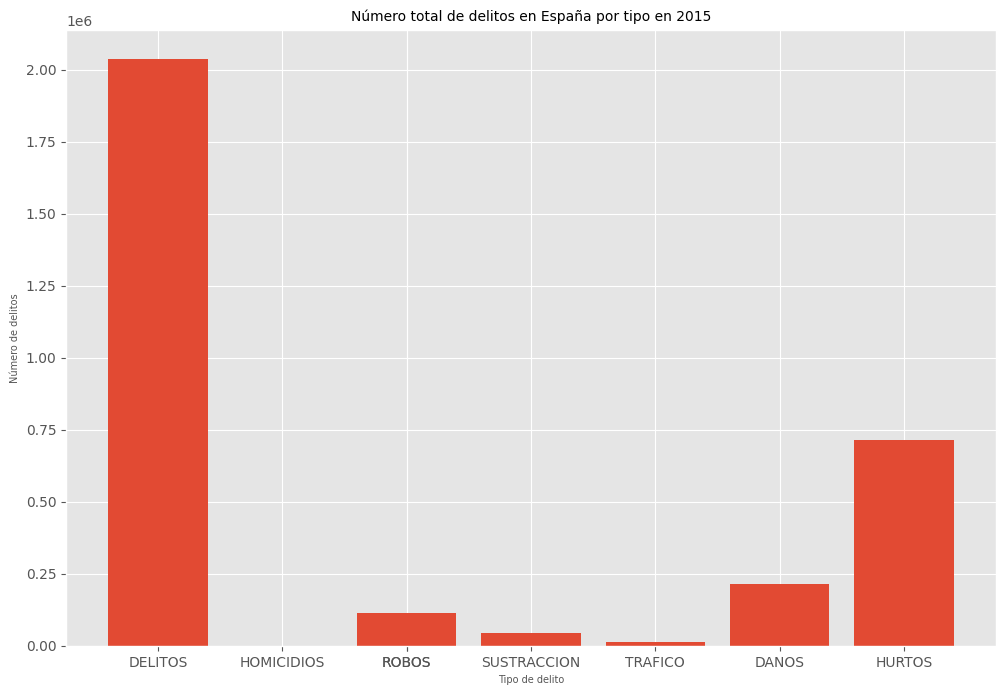

In [ ]:
# Se representa el numero total de delitos en toda españa por delito mediante un grafico de barras registrados en el cuarto trimestre y en el año 2015
df_nacional_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='TOTAL NACIONAL') & (df_definitivo['Trimestre']==4) & (df_definitivo['Año']==2015)]

plt.bar(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Cantidad'])
plt.xticks(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Delito'])
plt.title("Número total de delitos en España por tipo en 2015", fontsize=10)
plt.xlabel("Tipo de delito", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

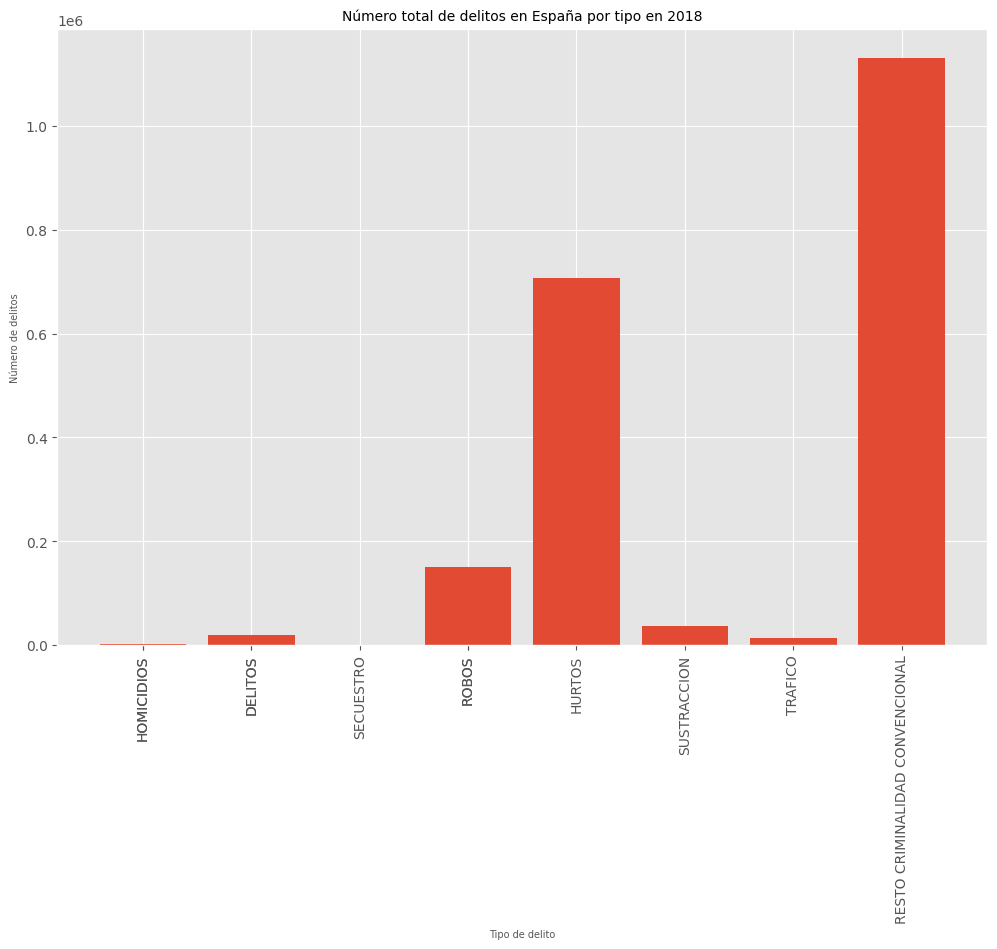

In [ ]:
# Se representa el numero total de delitos en toda españa por delito mediante un grafico de barras registrados en el cuarto trimestre y en el año 2018
df_nacional_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='TOTAL NACIONAL') & (df_definitivo['Trimestre']==4) & (df_definitivo['Año']==2018)]

plt.bar(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Cantidad'])
plt.xticks(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Delito'], rotation=90)
plt.title("Número total de delitos en España por tipo en 2018", fontsize=10)
plt.xlabel("Tipo de delito", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

5838       331.0
5839       836.0
5840     20051.0
5841        89.0
5842     65874.0
5843    142528.0
5844    700453.0
5845     35105.0
5846     16624.0
5847    985737.0
5848    192375.0
5849     25927.0
Name: Cantidad, dtype: float64


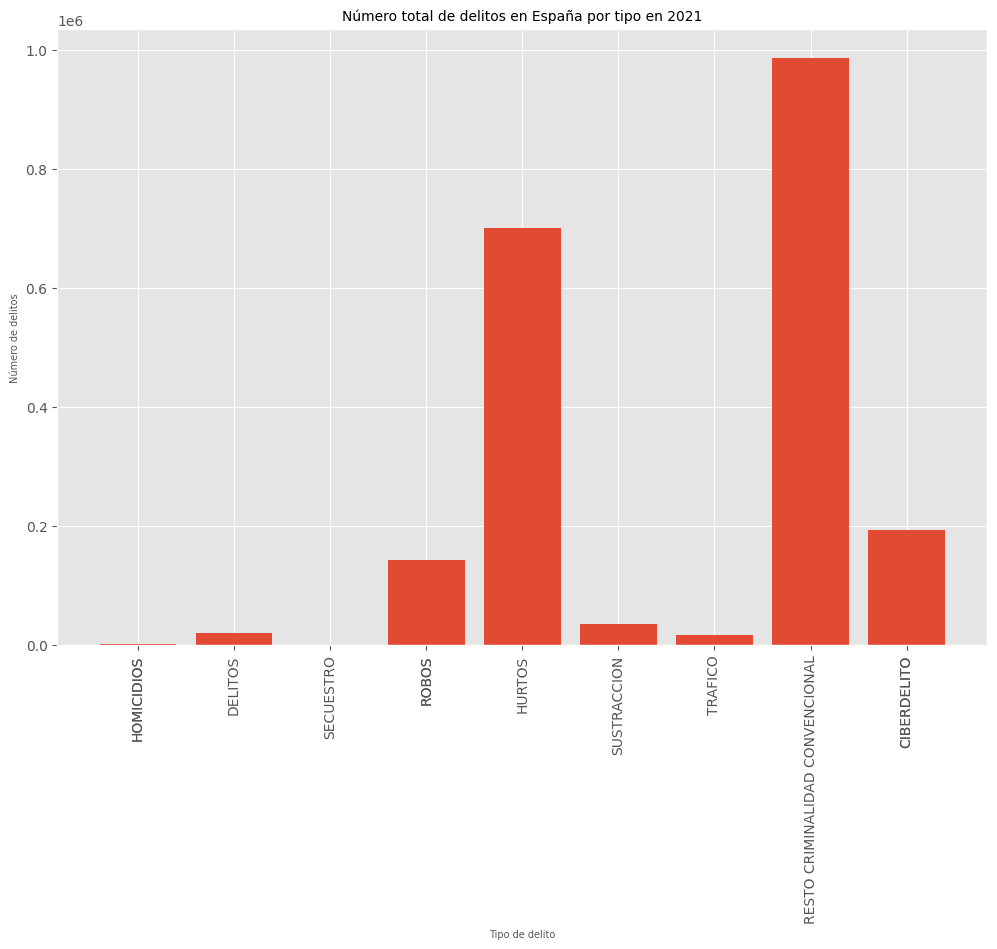

In [ ]:
# Se representa el numero total de delitos en toda españa por delito mediante un grafico de barras registrados en el cuarto trimestre y en el año 2021
df_nacional_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='TOTAL NACIONAL') & (df_definitivo['Trimestre']==4) & (df_definitivo['Año']==2021)]

print(df_nacional_delitos_año['Cantidad'])

plt.bar(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Cantidad'])
plt.xticks(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Delito'], rotation=90)
plt.title("Número total de delitos en España por tipo en 2021", fontsize=10)
plt.xlabel("Tipo de delito", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

6846        326.0
6847       1213.0
6848      26444.0
6849         84.0
6850      63392.0
6851     121039.0
6852     642276.0
6853      30767.0
6854      19057.0
6855    1026373.0
6856     335995.0
6857      38742.0
Name: Cantidad, dtype: float64


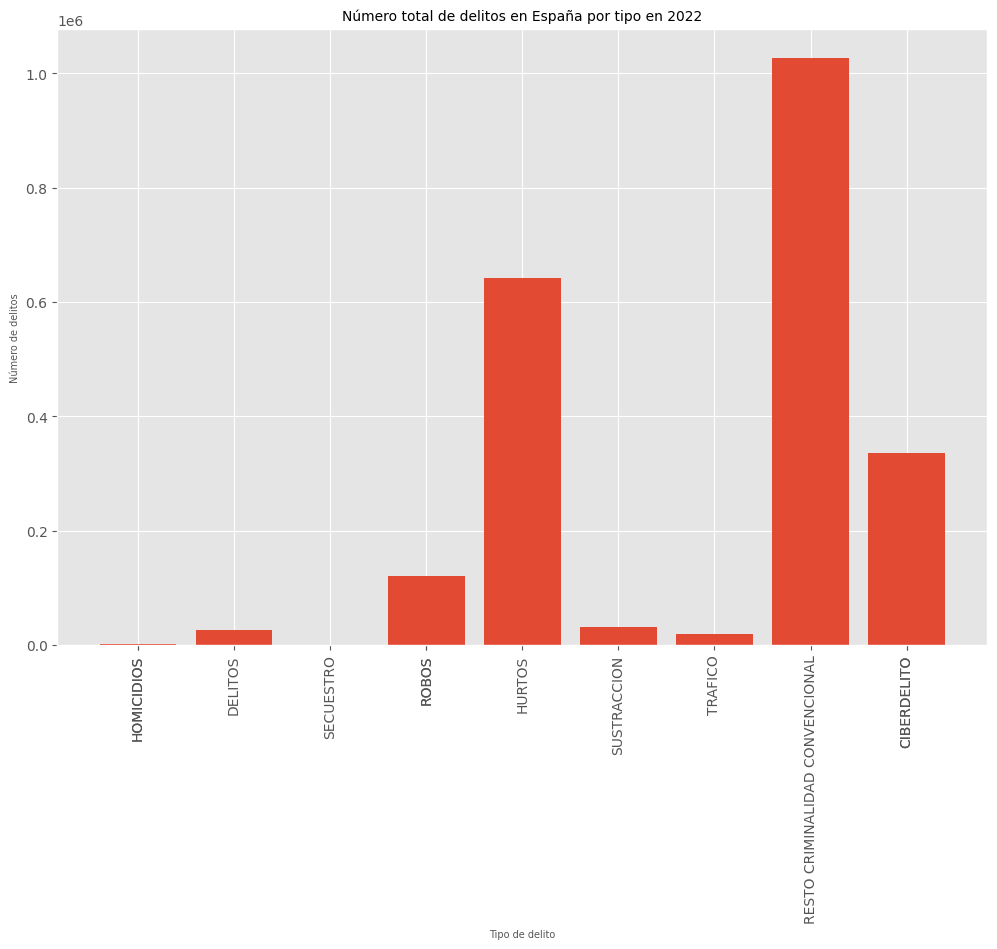

In [ ]:
# Se representa el numero total de delitos en toda españa por delito mediante un grafico de barras registrados en el cuarto trimestre y en el año 2022
df_nacional_delitos_año = df_definitivo[(df_definitivo['Comunidad']=='TOTAL NACIONAL') & (df_definitivo['Trimestre']==4) & (df_definitivo['Año']==2022)]

print(df_nacional_delitos_año['Cantidad'])

plt.bar(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Cantidad'])
plt.xticks(df_nacional_delitos_año['Delito'], df_nacional_delitos_año['Delito'], rotation=90)
plt.title("Número total de delitos en España por tipo en 2022", fontsize=10)
plt.xlabel("Tipo de delito", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

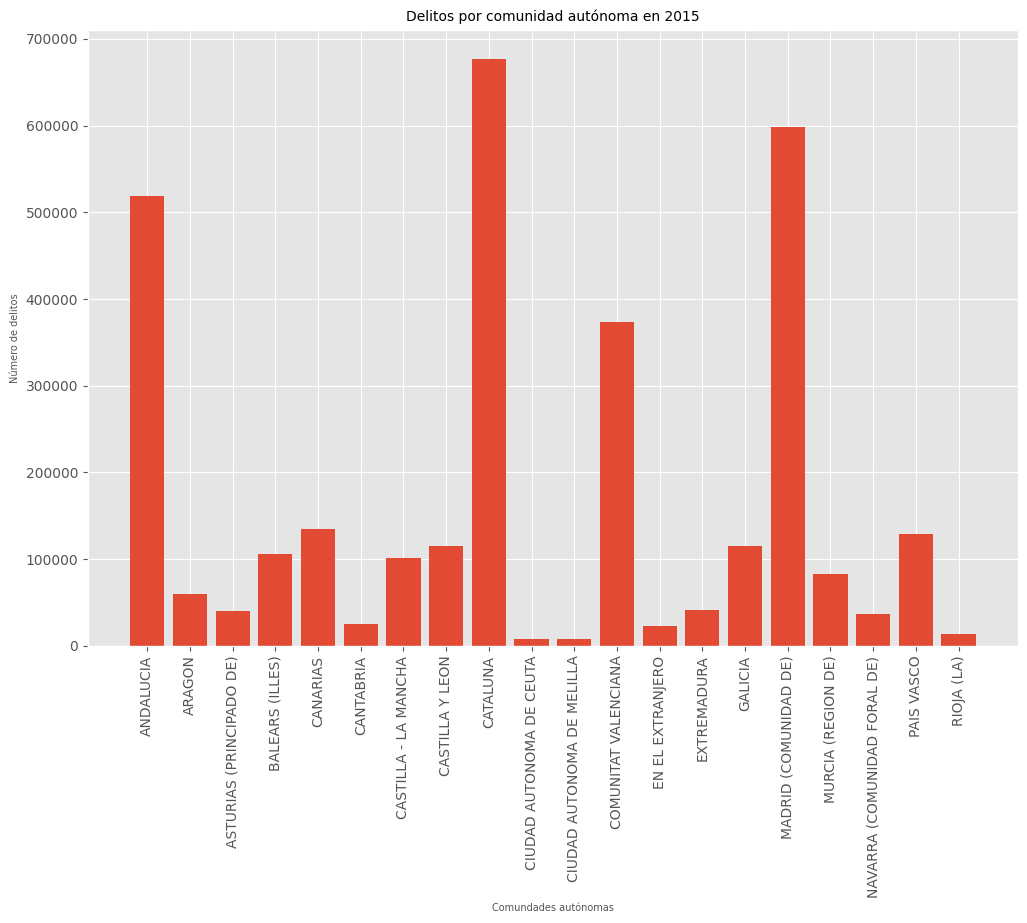

In [ ]:
# Se representa el numero total de delitos en españa por comunidades autónomas en el cuarto trimestre sin tener en cuenta el total nacional y en el año 2015
df_españa_delitos_año = df_definitivo[(df_definitivo['Año']==2015) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_delitos_año = df_españa_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

plt.bar(df_españa_delitos_año['Comunidad'], df_españa_delitos_año['Cantidad'])
plt.xticks(df_españa_delitos_año['Comunidad'], df_españa_delitos_año['Comunidad'])
plt.xticks(rotation=90)
plt.title("Delitos por comunidad autónoma en 2015", fontsize=10)
plt.xlabel("Comundades autónomas", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

0     337143.0
1      42295.0
2      26992.0
3      76962.0
4      94861.0
5      17984.0
6      69859.0
7      75947.0
8     486449.0
9       4725.0
10      5550.0
11    231038.0
12     15259.0
13     27402.0
14     79480.0
15    405769.0
16     56629.0
17     28975.0
18     93944.0
19      8667.0
Name: Cantidad, dtype: float64


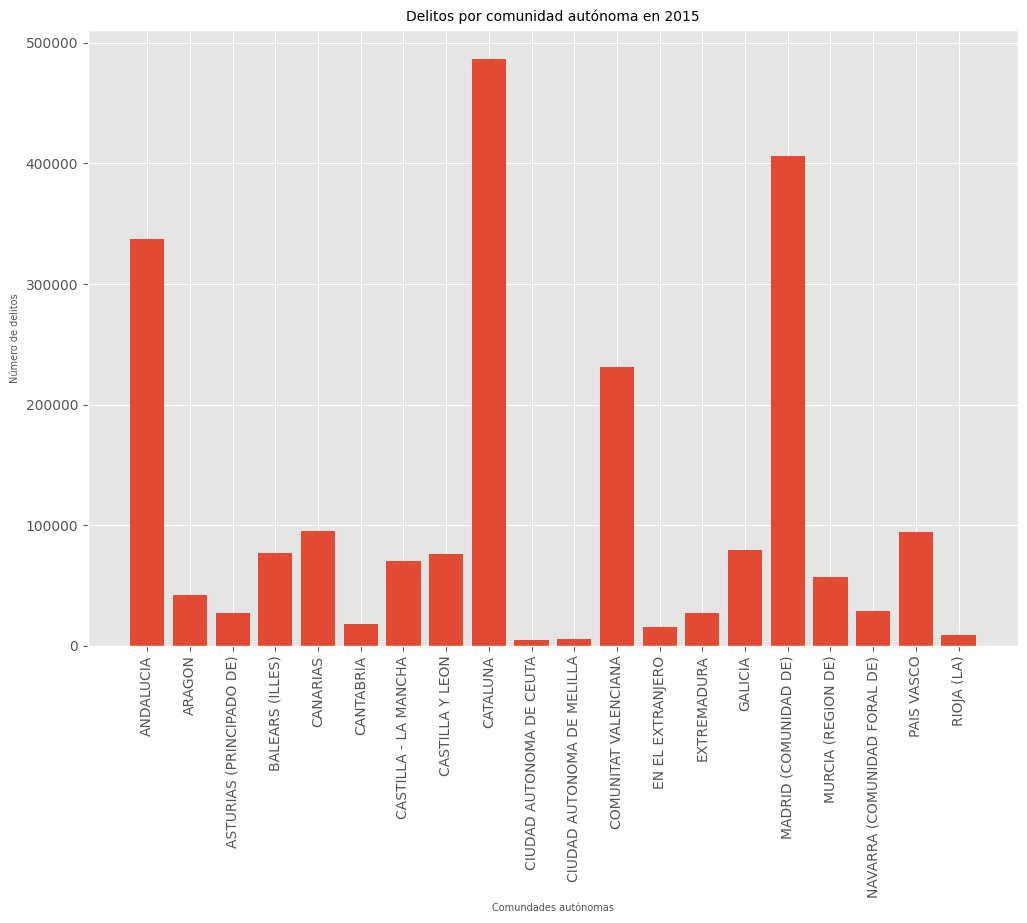

In [8]:
# Se representa el numero total de delitos en españa por comunidades autónomas en el cuarto trimestre sin tener en cuenta el total nacional y en el año 2021
df_españa_delitos_año = df_definitivo[(df_definitivo['Año']==2021) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_delitos_año = df_españa_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

print(df_españa_delitos_año['Cantidad'])

plt.bar(df_españa_delitos_año['Comunidad'], df_españa_delitos_año['Cantidad'])
plt.xticks(df_españa_delitos_año['Comunidad'], df_españa_delitos_año['Comunidad'])
plt.xticks(rotation=90)
plt.title("Delitos por comunidad autónoma en 2021", fontsize=10)
plt.xlabel("Comundades autónomas", fontsize=7)
plt.ylabel("Número de delitos", fontsize=7)
plt.show()

In [24]:
# Se representa el valor del registro con mayor número de delitos para cada comunidad autónoma en el año 2021
# Descomentando el código comentado también se puede printar la mediana del registro por comunidad autónoma en el año 2021
df_españa_delitos_año = df_definitivo[(df_definitivo['Año']==2021) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]


print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ANDALUCIA'].nlargest(1, 'Cantidad'))
#mediana_and = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ANDALUCIA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_and])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ARAGON'].nlargest(1, 'Cantidad'))
#mediana_ara = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ARAGON']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_ara])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ASTURIAS (PRINCIPADO DE)'].nlargest(1, 'Cantidad'))
#mediana_ast = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='ASTURIAS (PRINCIPADO DE)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_ast])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='BALEARS (ILLES)'].nlargest(1, 'Cantidad'))
#mediana_bale = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='BALEARS (ILLES)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_bale])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CANARIAS'].nlargest(1, 'Cantidad'))
#mediana_cana = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CANARIAS']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_cana])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CANTABRIA'].nlargest(1, 'Cantidad'))
#mediana_cant = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CANTABRIA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_cant])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CASTILLA - LA MANCHA'].nlargest(1, 'Cantidad'))
#mediana_castla = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CASTILLA - LA MANCHA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_castla])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CASTILLA Y LEON'].nlargest(1, 'Cantidad'))
#mediana_castyl = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CASTILLA Y LEON']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_castyl])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CATALUNA'].nlargest(1, 'Cantidad'))
#mediana_cat = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CATALUNA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_cat])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CIUDAD AUTONOMA DE CEUTA'].nlargest(1, 'Cantidad'))
#mediana_ceut = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CUIDAD AUTONOMA DE CEUTA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_ceut])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CIUDAD AUTONOMA DE MELILLA'].nlargest(1, 'Cantidad'))
#mediana_meli = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='CUIDAD AUTONOMA DE MELILLA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_meli])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='COMUNITAT VALENCIANA'].nlargest(1, 'Cantidad'))
#mediana_vale = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='COMUNITAT VALENCIANA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_vale])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='EXTREMADURA'].nlargest(1, 'Cantidad'))
#mediana_ext = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='EXTREMADURA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_ext])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='GALICIA'].nlargest(1, 'Cantidad'))
#mediana_gal = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='GALICIA']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_gal])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='MADRID (COMUNIDAD DE)'].nlargest(1, 'Cantidad'))
#mediana_mad = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='MADRID (COMUNIDAD DE)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_mad])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='MURCIA (REGION DE)'].nlargest(1, 'Cantidad'))
#mediana_mur = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='MURCIA (REGION DE)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_mur])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='NAVARRA (COMUNIDAD FORAL DE)'].nlargest(1, 'Cantidad'))
#mediana_nav = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='NAVARRA (COMUNIDAD FORAL DE)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_nav])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='PAIS VASCO'].nlargest(1, 'Cantidad'))
#mediana_pv = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='PAIS VASCO']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_pv])

print(df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='RIOJA (LA)'].nlargest(1, 'Cantidad'))
#mediana_lar = df_españa_delitos_año[df_españa_delitos_año['Comunidad']=='RIOJA (LA)']['Cantidad'].median()
#print(df_españa_delitos_año[df_españa_delitos_año['Cantidad']== mediana_lar])

      Comunidad   Año  Trimestre                           Delito Subdelito  \
5859  ANDALUCIA  2021          4  RESTO CRIMINALIDAD CONVENCIONAL         -   

      Cantidad  
5859  172816.0  
     Comunidad   Año  Trimestre                           Delito Subdelito  \
5871    ARAGON  2021          4  RESTO CRIMINALIDAD CONVENCIONAL         -   

      Cantidad  
5871   22045.0  
                     Comunidad   Año  Trimestre  \
5650  ASTURIAS (PRINCIPADO DE)  2021          3   

                               Delito Subdelito  Cantidad  
5650  RESTO CRIMINALIDAD CONVENCIONAL         -   13884.0  
            Comunidad   Año  Trimestre                           Delito  \
5895  BALEARS (ILLES)  2021          4  RESTO CRIMINALIDAD CONVENCIONAL   

     Subdelito  Cantidad  
5895         -   33986.0  
     Comunidad   Año  Trimestre                           Delito Subdelito  \
5907  CANARIAS  2021          4  RESTO CRIMINALIDAD CONVENCIONAL         -   

      Cantidad  
5907   50955.0

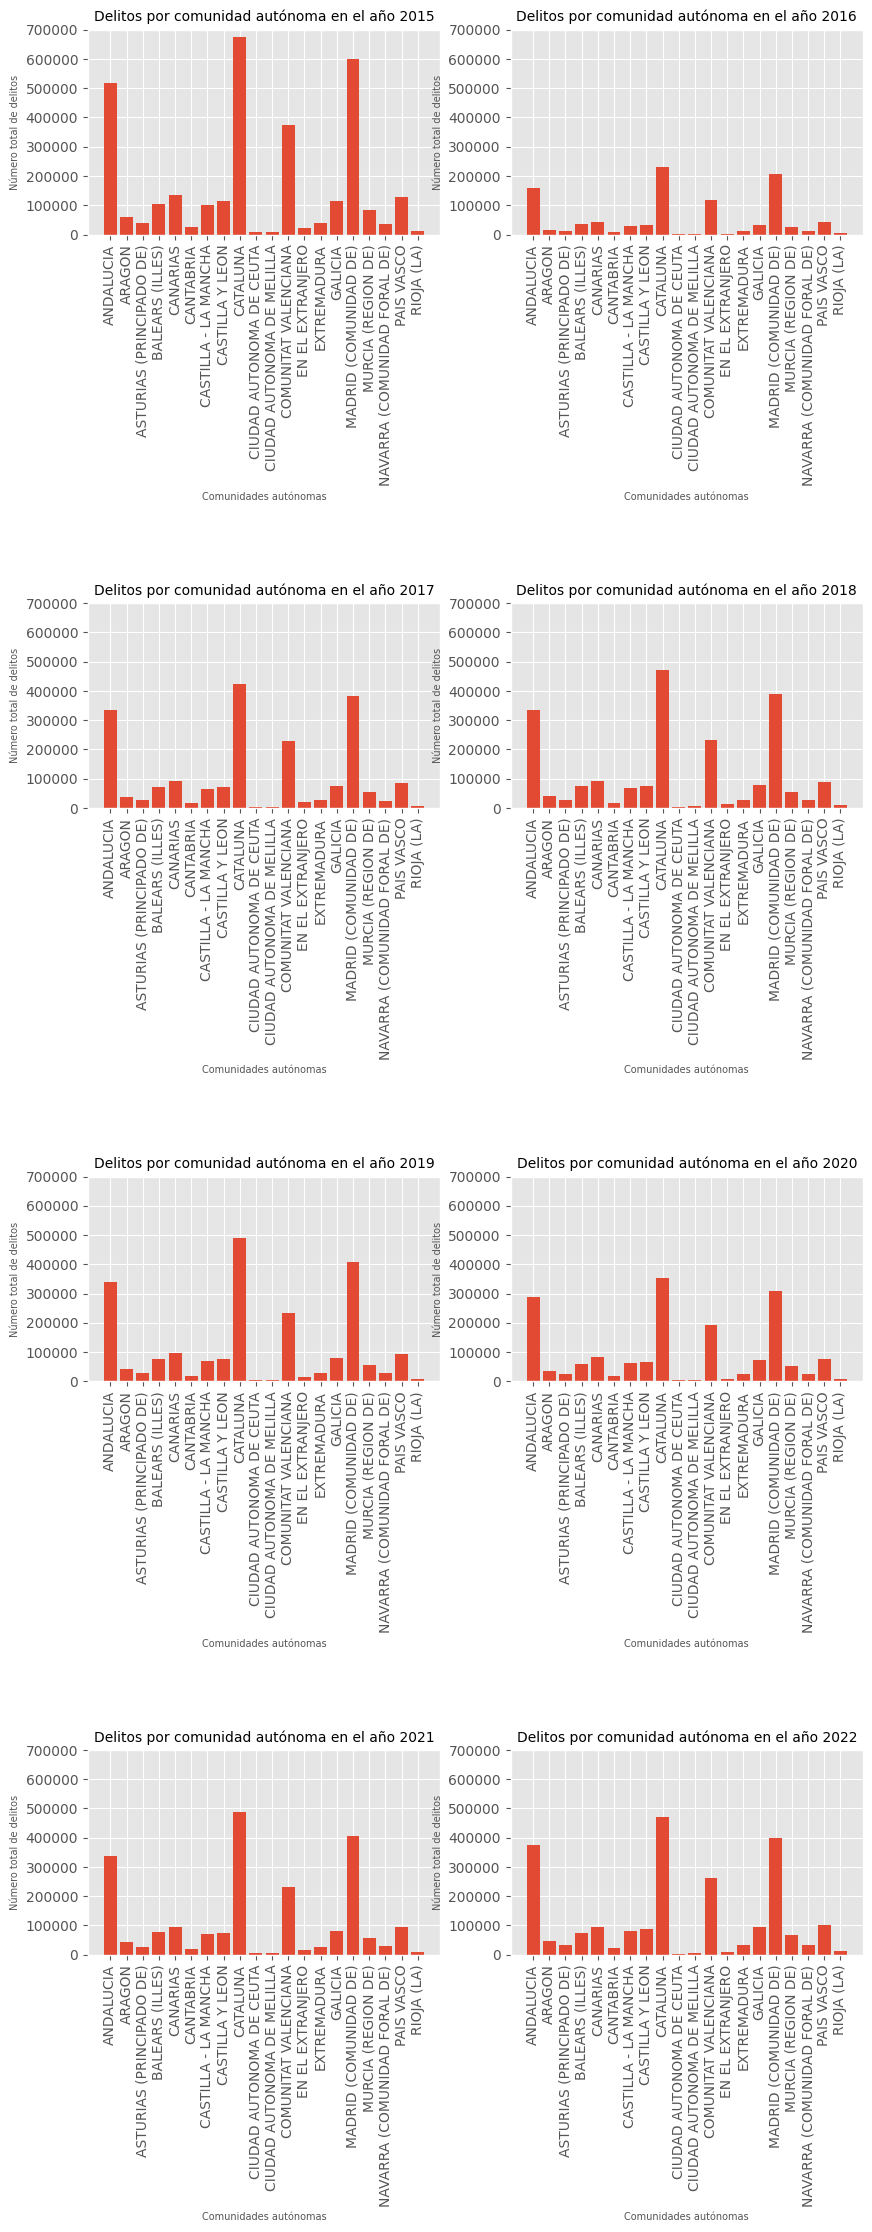

In [ ]:
# Se representa el numero total de delitos en españa por comunidad autónoma desde el 2015 al 2022 sin tener en cuenta el total nacional
df_españa_2015_delitos_año = df_definitivo[(df_definitivo['Año']==2015) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2015_delitos_año = df_españa_2015_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2016_delitos_año = df_definitivo[(df_definitivo['Año']==2016) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2016_delitos_año = df_españa_2016_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2017_delitos_año = df_definitivo[(df_definitivo['Año']==2017) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2017_delitos_año = df_españa_2017_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2018_delitos_año = df_definitivo[(df_definitivo['Año']==2018) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2018_delitos_año = df_españa_2018_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2019_delitos_año = df_definitivo[(df_definitivo['Año']==2019) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2019_delitos_año = df_españa_2019_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2020_delitos_año = df_definitivo[(df_definitivo['Año']==2020) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2020_delitos_año = df_españa_2020_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2021_delitos_año = df_definitivo[(df_definitivo['Año']==2021) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2021_delitos_año = df_españa_2021_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2022_delitos_año = df_definitivo[(df_definitivo['Año']==2022) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2022_delitos_año = df_españa_2022_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()


fig, ax = plt.subplots(4, 2, figsize=(10,25))

ax[0, 0].bar(df_españa_2015_delitos_año['Comunidad'], df_españa_2015_delitos_año['Cantidad'])
ax[0, 0].set_xticks(df_españa_2015_delitos_año['Comunidad'], df_españa_2015_delitos_año['Comunidad'])
ax[0, 0].set_xticklabels(df_españa_2015_delitos_año['Comunidad'], rotation=90)
ax[0, 0].set_ylim(0, 700000)
ax[0, 0].set_xlabel("Comunidades autónomas", fontsize=7)
ax[0, 0].set_ylabel("Número total de delitos", fontsize=7)
ax[0, 0].set_title("Delitos por comunidad autónoma en el año 2015", fontsize = 10)
ax[0, 1].bar(df_españa_2016_delitos_año['Comunidad'], df_españa_2016_delitos_año['Cantidad'])
ax[0, 1].set_xticks(df_españa_2016_delitos_año['Comunidad'], df_españa_2016_delitos_año['Comunidad'])
ax[0, 1].set_xticklabels(df_españa_2016_delitos_año['Comunidad'], rotation=90)
ax[0, 1].set_ylim(0, 700000)
ax[0, 1].set_xlabel("Comunidades autónomas", fontsize=7)
ax[0, 1].set_ylabel("Número total de delitos", fontsize=7)
ax[0, 1].set_title("Delitos por comunidad autónoma en el año 2016", fontsize = 10)
ax[1, 0].bar(df_españa_2017_delitos_año['Comunidad'], df_españa_2017_delitos_año['Cantidad'])
ax[1, 0].set_xticks(df_españa_2017_delitos_año['Comunidad'], df_españa_2017_delitos_año['Comunidad'])
ax[1, 0].set_xticklabels(df_españa_2017_delitos_año['Comunidad'], rotation=90)
ax[1, 0].set_ylim(0, 700000)
ax[1, 0].set_xlabel("Comunidades autónomas", fontsize=7)
ax[1, 0].set_ylabel("Número total de delitos", fontsize=7)
ax[1, 0].set_title("Delitos por comunidad autónoma en el año 2017", fontsize = 10)
ax[1, 1].bar(df_españa_2018_delitos_año['Comunidad'], df_españa_2018_delitos_año['Cantidad'])
ax[1, 1].set_xticks(df_españa_2018_delitos_año['Comunidad'], df_españa_2018_delitos_año['Comunidad'])
ax[1, 1].set_xticklabels(df_españa_2018_delitos_año['Comunidad'], rotation=90)
ax[1, 1].set_ylim(0, 700000)
ax[1, 1].set_xlabel("Comunidades autónomas", fontsize=7)
ax[1, 1].set_ylabel("Número total de delitos", fontsize=7)
ax[1, 1].set_title("Delitos por comunidad autónoma en el año 2018", fontsize = 10)
ax[2, 0].bar(df_españa_2019_delitos_año['Comunidad'], df_españa_2019_delitos_año['Cantidad'])
ax[2, 0].set_xticks(df_españa_2019_delitos_año['Comunidad'], df_españa_2019_delitos_año['Comunidad'])
ax[2, 0].set_xticklabels(df_españa_2019_delitos_año['Comunidad'], rotation=90)
ax[2, 0].set_ylim(0, 700000)
ax[2, 0].set_xlabel("Comunidades autónomas", fontsize=7)
ax[2, 0].set_ylabel("Número total de delitos", fontsize=7)
ax[2, 0].set_title("Delitos por comunidad autónoma en el año 2019", fontsize = 10)
ax[2, 1].bar(df_españa_2020_delitos_año['Comunidad'], df_españa_2020_delitos_año['Cantidad'])
ax[2, 1].set_xticks(df_españa_2020_delitos_año['Comunidad'], df_españa_2020_delitos_año['Comunidad'])
ax[2, 1].set_xticklabels(df_españa_2020_delitos_año['Comunidad'], rotation=90)
ax[2, 1].set_ylim(0, 700000)
ax[2, 1].set_xlabel("Comunidades autónomas", fontsize=7)
ax[2, 1].set_ylabel("Número total de delitos", fontsize=7)
ax[2, 1].set_title("Delitos por comunidad autónoma en el año 2020", fontsize = 10)
ax[3, 0].bar(df_españa_2021_delitos_año['Comunidad'], df_españa_2021_delitos_año['Cantidad'])
ax[3, 0].set_xticks(df_españa_2021_delitos_año['Comunidad'], df_españa_2021_delitos_año['Comunidad'])
ax[3, 0].set_xticklabels(df_españa_2021_delitos_año['Comunidad'], rotation=90)
ax[3, 0].set_ylim(0, 700000)
ax[3, 0].set_xlabel("Comunidades autónomas", fontsize=7)
ax[3, 0].set_ylabel("Número total de delitos", fontsize=7)
ax[3, 0].set_title("Delitos por comunidad autónoma en el año 2021", fontsize = 10)
ax[3, 1].bar(df_españa_2022_delitos_año['Comunidad'], df_españa_2022_delitos_año['Cantidad'])
ax[3, 1].set_xticks(df_españa_2022_delitos_año['Comunidad'], df_españa_2022_delitos_año['Comunidad'])
ax[3, 1].set_xticklabels(df_españa_2022_delitos_año['Comunidad'], rotation=90)
ax[3, 1].set_ylim(0, 700000)
ax[3, 1].set_xlabel("Comunidades autónomas", fontsize=7)
ax[3, 1].set_ylabel("Número total de delitos", fontsize=7)
ax[3, 1].set_title("Delitos por comunidad autónoma en el año 2022", fontsize = 10)
plt.subplots_adjust(hspace=1.8)
plt.show()

In [ ]:
# Gracias a la librería folium, se representa los delitos de cada comunidad autónoma en un mapa de españa mediante bolas de colores que indican la cantidad de delitos registrados.

import folium as fl
import matplotlib.colors as mcolors

map = fl.Map(location=[40.4380986,-3.844343], zoom_start=5.49)

df_españa_2022_delitos_año = df_definitivo[(df_definitivo['Año']==2022) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]

df_españa_2022_delitos_año = df_españa_2022_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

max_opacity = max(df_españa_2022_delitos_año['Cantidad'].astype(int))
min_opacity = min(df_españa_2022_delitos_año['Cantidad'].astype(int))

cmap = plt.get_cmap('RdYlGn_r')

norm = mcolors.Normalize(vmin=min_opacity, vmax=max_opacity)

df_españa_2022_delitos_andalucia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ANDALUCIA']
andalucia_cant = df_españa_2022_delitos_andalucia['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(andalucia_cant)))
fl.CircleMarker(location=[37.432989, -4.599133], radius = (andalucia_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_aragon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2022_delitos_aragon['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(aragon_cant)))
fl.CircleMarker(location=[41.651748,-0.9361803], radius = (aragon_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_asturias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2022_delitos_asturias['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(asturias_cant)))
fl.CircleMarker(location=[43.3695114,-5.8876261], radius = (asturias_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_baleares = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
baleares_cant = df_españa_2022_delitos_baleares['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(baleares_cant)))
fl.CircleMarker(location=[39.596917, 2.951055], radius = (baleares_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_canarias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2022_delitos_canarias['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(canarias_cant)))
fl.CircleMarker(location=[28.270415, -16.634478], radius = (canarias_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_cantabria = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2022_delitos_cantabria['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(cantabria_cant)))
fl.CircleMarker(location=[43.195497, -4.066668], radius = (cantabria_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_castilla_mancha = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
castilla_macha_cant = df_españa_2022_delitos_castilla_mancha['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(castilla_macha_cant)))
fl.CircleMarker(location=[39.3966188,-3.2357369], radius = (castilla_macha_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_castilla_leon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
castilla_leon_cant = df_españa_2022_delitos_castilla_leon['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(castilla_leon_cant)))
fl.CircleMarker(location=[41.744185, -4.618607], radius = (castilla_leon_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_cataluña = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CATALUNA']
cataluña_cant = df_españa_2022_delitos_cataluña['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(cataluña_cant)))
fl.CircleMarker(location=[41.3927673,2.0577888], radius = (cataluña_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_ceuta = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2022_delitos_ceuta['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(ceuta_cant)))
fl.CircleMarker(location=[35.8890894,-5.3391254], radius = (ceuta_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_melilla = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2022_delitos_melilla['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(melilla_cant)))
fl.CircleMarker(location=[35.2929067,-2.9673006], radius = (melilla_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_valencia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2022_delitos_valencia['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(valencia_cant)))
fl.CircleMarker(location=[39.4078888,-0.4439117], radius = (valencia_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_extranjero = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'EN EL EXTRANJERO']
extranjera_cant = df_españa_2022_delitos_extranjero['Cantidad'].astype(int).item()

df_españa_2022_delitos_extremadura = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2022_delitos_extremadura['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(extremadura_cant)))
fl.CircleMarker(location=[39.4716679,-6.4113187], radius = (extremadura_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_galicia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2022_delitos_galicia['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(galicia_cant)))
fl.CircleMarker(location=[42.7176752,-7.7721626], radius = (galicia_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_madrid = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2022_delitos_madrid['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(madrid_cant)))
fl.CircleMarker(location=[40.4513834,-3.8162537], radius = (madrid_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_murcia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2022_delitos_murcia['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(murcia_cant)))
fl.CircleMarker(location=[37.936070, -1.522271], radius = (murcia_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_navarra = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2022_delitos_navarra['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(navarra_cant)))
fl.CircleMarker(location=[42.8157956,-1.6706211], radius = (navarra_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_paisvasco = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'PAIS VASCO']
paisvasco_cant = df_españa_2022_delitos_paisvasco['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(paisvasco_cant)))
fl.CircleMarker(location=[42.9922205,-2.922283], radius = (paisvasco_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

df_españa_2022_delitos_rioja = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2022_delitos_rioja['Cantidad'].astype(int).item()
color = mcolors.to_hex(cmap(norm(rioja_cant)))
fl.CircleMarker(location=[42.279145, -2.543860], radius = (rioja_cant/18000), color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map)

map

In [ ]:
# Se crea un nuevo datafreme a partir del dataset unificado para poder crear un heatmap para encontrar las relaciones entre los años y las comunidades autónomas

comu_autonoma = []
año_2015 = []
año_2016 = []
año_2017 = []
año_2018 = []
año_2019 = []
año_2020 = []
año_2021 = []
año_2022 = []

comu_autonoma.append("ARAGON")
comu_autonoma.append("ANDALUCIA")
comu_autonoma.append("ASTURIAS")
comu_autonoma.append("BALEARS")
comu_autonoma.append("CANARIAS")
comu_autonoma.append("CANTABRIA")
comu_autonoma.append("CASTILLA LA MANCHA")
comu_autonoma.append("CASTILLA Y LEON")
comu_autonoma.append("CATALUÑA")
comu_autonoma.append("CEUTA")
comu_autonoma.append("MELILLA")
comu_autonoma.append("VALENCIA")
comu_autonoma.append("EXTREMADURA")
comu_autonoma.append("GALICIA")
comu_autonoma.append("MADRID")
comu_autonoma.append("MURCIA")
comu_autonoma.append("NAVARRA")
comu_autonoma.append("PAIS VASCO")
comu_autonoma.append("LA RIOJA")

df_españa_2015_delitos_año = df_definitivo[(df_definitivo['Año']==2015) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2015_delitos_año = df_españa_2015_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2015_delitos_aragon = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2015_delitos_aragon['Cantidad'].astype(int).item()
año_2015.append(aragon_cant)
df_españa_2015_delitos_andalucia = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2015_delitos_andalucia['Cantidad'].astype(int).item()
año_2015.append(ancalucia_cant)
df_españa_2015_delitos_asturias = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2015_delitos_asturias['Cantidad'].astype(int).item()
año_2015.append(asturias_cant)
df_españa_2015_delitos_balears = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2015_delitos_balears['Cantidad'].astype(int).item()
año_2015.append(balears_cant)
df_españa_2015_delitos_canarias = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2015_delitos_canarias['Cantidad'].astype(int).item()
año_2015.append(canarias_cant)
df_españa_2015_delitos_cantabria = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2015_delitos_cantabria['Cantidad'].astype(int).item()
año_2015.append(cantabria_cant)
df_españa_2015_delitos_castillamancha = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2015_delitos_castillamancha['Cantidad'].astype(int).item()
año_2015.append(mancha_cant)
df_españa_2015_delitos_castillaleon = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2015_delitos_castillaleon['Cantidad'].astype(int).item()
año_2015.append(leon_cant)
df_españa_2015_delitos_cataluna = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2015_delitos_cataluna['Cantidad'].astype(int).item()
año_2015.append(cataluna_cant)
df_españa_2015_delitos_ceuta = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2015_delitos_ceuta['Cantidad'].astype(int).item()
año_2015.append(ceuta_cant)
df_españa_2015_delitos_melilla = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2015_delitos_melilla['Cantidad'].astype(int).item()
año_2015.append(melilla_cant)
df_españa_2015_delitos_valencia = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2015_delitos_valencia['Cantidad'].astype(int).item()
año_2015.append(valencia_cant)
df_españa_2015_delitos_extremadura = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2015_delitos_extremadura['Cantidad'].astype(int).item()
año_2015.append(extremadura_cant)
df_españa_2015_delitos_galicia = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2015_delitos_galicia['Cantidad'].astype(int).item()
año_2015.append(galicia_cant)
df_españa_2015_delitos_madrid = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2015_delitos_madrid['Cantidad'].astype(int).item()
año_2015.append(madrid_cant)
df_españa_2015_delitos_murcia = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2015_delitos_murcia['Cantidad'].astype(int).item()
año_2015.append(murcia_cant)
df_españa_2015_delitos_navarra = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2015_delitos_navarra['Cantidad'].astype(int).item()
año_2015.append(navarra_cant)
df_españa_2015_delitos_pvasco = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2015_delitos_pvasco['Cantidad'].astype(int).item()
año_2015.append(pvasco_cant)
df_españa_2015_delitos_rioja = df_españa_2015_delitos_año[df_españa_2015_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2015_delitos_rioja['Cantidad'].astype(int).item()
año_2015.append(rioja_cant)

df_españa_2016_delitos_año = df_definitivo[(df_definitivo['Año']==2016) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2016_delitos_año = df_españa_2016_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2016_delitos_aragon = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2016_delitos_aragon['Cantidad'].astype(int).item()
año_2016.append(aragon_cant)
df_españa_2016_delitos_andalucia = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2016_delitos_andalucia['Cantidad'].astype(int).item()
año_2016.append(ancalucia_cant)
df_españa_2016_delitos_asturias = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2016_delitos_asturias['Cantidad'].astype(int).item()
año_2016.append(asturias_cant)
df_españa_2016_delitos_balears = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2016_delitos_balears['Cantidad'].astype(int).item()
año_2016.append(balears_cant)
df_españa_2016_delitos_canarias = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2016_delitos_canarias['Cantidad'].astype(int).item()
año_2016.append(canarias_cant)
df_españa_2016_delitos_cantabria = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2016_delitos_cantabria['Cantidad'].astype(int).item()
año_2016.append(cantabria_cant)
df_españa_2016_delitos_castillamancha = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2016_delitos_castillamancha['Cantidad'].astype(int).item()
año_2016.append(mancha_cant)
df_españa_2016_delitos_castillaleon = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2016_delitos_castillaleon['Cantidad'].astype(int).item()
año_2016.append(leon_cant)
df_españa_2016_delitos_cataluna = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2016_delitos_cataluna['Cantidad'].astype(int).item()
año_2016.append(cataluna_cant)
df_españa_2016_delitos_ceuta = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2016_delitos_ceuta['Cantidad'].astype(int).item()
año_2016.append(ceuta_cant)
df_españa_2016_delitos_melilla = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2016_delitos_melilla['Cantidad'].astype(int).item()
año_2016.append(melilla_cant)
df_españa_2016_delitos_valencia = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2016_delitos_valencia['Cantidad'].astype(int).item()
año_2016.append(valencia_cant)
df_españa_2016_delitos_extremadura = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2016_delitos_extremadura['Cantidad'].astype(int).item()
año_2016.append(extremadura_cant)
df_españa_2016_delitos_galicia = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2016_delitos_galicia['Cantidad'].astype(int).item()
año_2016.append(galicia_cant)
df_españa_2016_delitos_madrid = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2016_delitos_madrid['Cantidad'].astype(int).item()
año_2016.append(madrid_cant)
df_españa_2016_delitos_murcia = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2016_delitos_murcia['Cantidad'].astype(int).item()
año_2016.append(murcia_cant)
df_españa_2016_delitos_navarra = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2016_delitos_navarra['Cantidad'].astype(int).item()
año_2016.append(navarra_cant)
df_españa_2016_delitos_pvasco = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2016_delitos_pvasco['Cantidad'].astype(int).item()
año_2016.append(pvasco_cant)
df_españa_2016_delitos_rioja = df_españa_2016_delitos_año[df_españa_2016_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2016_delitos_rioja['Cantidad'].astype(int).item()
año_2016.append(rioja_cant)

df_españa_2017_delitos_año = df_definitivo[(df_definitivo['Año']==2017) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2017_delitos_año = df_españa_2017_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2017_delitos_aragon = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2017_delitos_aragon['Cantidad'].astype(int).item()
año_2017.append(aragon_cant)
df_españa_2017_delitos_andalucia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2017_delitos_andalucia['Cantidad'].astype(int).item()
año_2017.append(ancalucia_cant)
df_españa_2017_delitos_asturias = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2017_delitos_asturias['Cantidad'].astype(int).item()
año_2017.append(asturias_cant)
df_españa_2017_delitos_balears = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2017_delitos_balears['Cantidad'].astype(int).item()
año_2017.append(balears_cant)
df_españa_2017_delitos_canarias = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2017_delitos_canarias['Cantidad'].astype(int).item()
año_2017.append(canarias_cant)
df_españa_2017_delitos_cantabria = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2017_delitos_cantabria['Cantidad'].astype(int).item()
año_2017.append(cantabria_cant)
df_españa_2017_delitos_castillamancha = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2017_delitos_castillamancha['Cantidad'].astype(int).item()
año_2017.append(mancha_cant)
df_españa_2017_delitos_castillaleon = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2017_delitos_castillaleon['Cantidad'].astype(int).item()
año_2017.append(leon_cant)
df_españa_2017_delitos_cataluna = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2017_delitos_cataluna['Cantidad'].astype(int).item()
año_2017.append(cataluna_cant)
df_españa_2017_delitos_ceuta = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2017_delitos_ceuta['Cantidad'].astype(int).item()
año_2017.append(ceuta_cant)
df_españa_2017_delitos_melilla = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2017_delitos_melilla['Cantidad'].astype(int).item()
año_2017.append(melilla_cant)
df_españa_2017_delitos_valencia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2017_delitos_valencia['Cantidad'].astype(int).item()
año_2017.append(valencia_cant)
df_españa_2017_delitos_extremadura = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2017_delitos_extremadura['Cantidad'].astype(int).item()
año_2017.append(extremadura_cant)
df_españa_2017_delitos_galicia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2017_delitos_galicia['Cantidad'].astype(int).item()
año_2017.append(galicia_cant)
df_españa_2017_delitos_madrid = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2017_delitos_madrid['Cantidad'].astype(int).item()
año_2017.append(madrid_cant)
df_españa_2017_delitos_murcia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2017_delitos_murcia['Cantidad'].astype(int).item()
año_2017.append(murcia_cant)
df_españa_2017_delitos_navarra = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2017_delitos_navarra['Cantidad'].astype(int).item()
año_2017.append(navarra_cant)
df_españa_2017_delitos_pvasco = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2017_delitos_pvasco['Cantidad'].astype(int).item()
año_2017.append(pvasco_cant)
df_españa_2017_delitos_rioja = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2017_delitos_rioja['Cantidad'].astype(int).item()
año_2017.append(rioja_cant)

df_españa_2018_delitos_año = df_definitivo[(df_definitivo['Año']==2018) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2018_delitos_año = df_españa_2018_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2018_delitos_aragon = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2018_delitos_aragon['Cantidad'].astype(int).item()
año_2018.append(aragon_cant)
df_españa_2018_delitos_andalucia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2018_delitos_andalucia['Cantidad'].astype(int).item()
año_2018.append(ancalucia_cant)
df_españa_2018_delitos_asturias = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2018_delitos_asturias['Cantidad'].astype(int).item()
año_2018.append(asturias_cant)
df_españa_2018_delitos_balears = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2018_delitos_balears['Cantidad'].astype(int).item()
año_2018.append(balears_cant)
df_españa_2018_delitos_canarias = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2018_delitos_canarias['Cantidad'].astype(int).item()
año_2018.append(canarias_cant)
df_españa_2018_delitos_cantabria = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2018_delitos_cantabria['Cantidad'].astype(int).item()
año_2018.append(cantabria_cant)
df_españa_2018_delitos_castillamancha = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2018_delitos_castillamancha['Cantidad'].astype(int).item()
año_2018.append(mancha_cant)
df_españa_2018_delitos_castillaleon = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2018_delitos_castillaleon['Cantidad'].astype(int).item()
año_2018.append(leon_cant)
df_españa_2018_delitos_cataluna = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2018_delitos_cataluna['Cantidad'].astype(int).item()
año_2018.append(cataluna_cant)
df_españa_2018_delitos_ceuta = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2018_delitos_ceuta['Cantidad'].astype(int).item()
año_2018.append(ceuta_cant)
df_españa_2018_delitos_melilla = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2018_delitos_melilla['Cantidad'].astype(int).item()
año_2018.append(melilla_cant)
df_españa_2018_delitos_valencia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2018_delitos_valencia['Cantidad'].astype(int).item()
año_2018.append(valencia_cant)
df_españa_2018_delitos_extremadura = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2018_delitos_extremadura['Cantidad'].astype(int).item()
año_2018.append(extremadura_cant)
df_españa_2018_delitos_galicia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2018_delitos_galicia['Cantidad'].astype(int).item()
año_2018.append(galicia_cant)
df_españa_2018_delitos_madrid = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2018_delitos_madrid['Cantidad'].astype(int).item()
año_2018.append(madrid_cant)
df_españa_2018_delitos_murcia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2018_delitos_murcia['Cantidad'].astype(int).item()
año_2018.append(murcia_cant)
df_españa_2018_delitos_navarra = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2018_delitos_navarra['Cantidad'].astype(int).item()
año_2018.append(navarra_cant)
df_españa_2018_delitos_pvasco = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2018_delitos_pvasco['Cantidad'].astype(int).item()
año_2018.append(pvasco_cant)
df_españa_2018_delitos_rioja = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2018_delitos_rioja['Cantidad'].astype(int).item()
año_2018.append(rioja_cant)

df_españa_2019_delitos_año = df_definitivo[(df_definitivo['Año']==2019) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2019_delitos_año = df_españa_2019_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2019_delitos_aragon = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2019_delitos_aragon['Cantidad'].astype(int).item()
año_2019.append(aragon_cant)
df_españa_2019_delitos_andalucia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2019_delitos_andalucia['Cantidad'].astype(int).item()
año_2019.append(ancalucia_cant)
df_españa_2019_delitos_asturias = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2019_delitos_asturias['Cantidad'].astype(int).item()
año_2019.append(asturias_cant)
df_españa_2019_delitos_balears = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2019_delitos_balears['Cantidad'].astype(int).item()
año_2019.append(balears_cant)
df_españa_2019_delitos_canarias = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2019_delitos_canarias['Cantidad'].astype(int).item()
año_2019.append(canarias_cant)
df_españa_2019_delitos_cantabria = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2019_delitos_cantabria['Cantidad'].astype(int).item()
año_2019.append(cantabria_cant)
df_españa_2019_delitos_castillamancha = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2019_delitos_castillamancha['Cantidad'].astype(int).item()
año_2019.append(mancha_cant)
df_españa_2019_delitos_castillaleon = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2019_delitos_castillaleon['Cantidad'].astype(int).item()
año_2019.append(leon_cant)
df_españa_2019_delitos_cataluna = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2019_delitos_cataluna['Cantidad'].astype(int).item()
año_2019.append(cataluna_cant)
df_españa_2019_delitos_ceuta = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2019_delitos_ceuta['Cantidad'].astype(int).item()
año_2019.append(ceuta_cant)
df_españa_2019_delitos_melilla = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2019_delitos_melilla['Cantidad'].astype(int).item()
año_2019.append(melilla_cant)
df_españa_2019_delitos_valencia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2019_delitos_valencia['Cantidad'].astype(int).item()
año_2019.append(valencia_cant)
df_españa_2019_delitos_extremadura = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2019_delitos_extremadura['Cantidad'].astype(int).item()
año_2019.append(extremadura_cant)
df_españa_2019_delitos_galicia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2019_delitos_galicia['Cantidad'].astype(int).item()
año_2019.append(galicia_cant)
df_españa_2019_delitos_madrid = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2019_delitos_madrid['Cantidad'].astype(int).item()
año_2019.append(madrid_cant)
df_españa_2019_delitos_murcia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2019_delitos_murcia['Cantidad'].astype(int).item()
año_2019.append(murcia_cant)
df_españa_2019_delitos_navarra = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2019_delitos_navarra['Cantidad'].astype(int).item()
año_2019.append(navarra_cant)
df_españa_2019_delitos_pvasco = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2019_delitos_pvasco['Cantidad'].astype(int).item()
año_2019.append(pvasco_cant)
df_españa_2019_delitos_rioja = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2019_delitos_rioja['Cantidad'].astype(int).item()
año_2019.append(rioja_cant)

df_españa_2020_delitos_año = df_definitivo[(df_definitivo['Año']==2020) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2020_delitos_año = df_españa_2020_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2020_delitos_aragon = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2020_delitos_aragon['Cantidad'].astype(int).item()
año_2020.append(aragon_cant)
df_españa_2020_delitos_andalucia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2020_delitos_andalucia['Cantidad'].astype(int).item()
año_2020.append(ancalucia_cant)
df_españa_2020_delitos_asturias = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2020_delitos_asturias['Cantidad'].astype(int).item()
año_2020.append(asturias_cant)
df_españa_2020_delitos_balears = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2020_delitos_balears['Cantidad'].astype(int).item()
año_2020.append(balears_cant)
df_españa_2020_delitos_canarias = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2020_delitos_canarias['Cantidad'].astype(int).item()
año_2020.append(canarias_cant)
df_españa_2020_delitos_cantabria = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2020_delitos_cantabria['Cantidad'].astype(int).item()
año_2020.append(cantabria_cant)
df_españa_2020_delitos_castillamancha = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2020_delitos_castillamancha['Cantidad'].astype(int).item()
año_2020.append(mancha_cant)
df_españa_2020_delitos_castillaleon = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2020_delitos_castillaleon['Cantidad'].astype(int).item()
año_2020.append(leon_cant)
df_españa_2020_delitos_cataluna = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2020_delitos_cataluna['Cantidad'].astype(int).item()
año_2020.append(cataluna_cant)
df_españa_2020_delitos_ceuta = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2020_delitos_ceuta['Cantidad'].astype(int).item()
año_2020.append(ceuta_cant)
df_españa_2020_delitos_melilla = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2020_delitos_melilla['Cantidad'].astype(int).item()
año_2020.append(melilla_cant)
df_españa_2020_delitos_valencia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2020_delitos_valencia['Cantidad'].astype(int).item()
año_2020.append(valencia_cant)
df_españa_2020_delitos_extremadura = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2020_delitos_extremadura['Cantidad'].astype(int).item()
año_2020.append(extremadura_cant)
df_españa_2020_delitos_galicia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2020_delitos_galicia['Cantidad'].astype(int).item()
año_2020.append(galicia_cant)
df_españa_2020_delitos_madrid = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2020_delitos_madrid['Cantidad'].astype(int).item()
año_2020.append(madrid_cant)
df_españa_2020_delitos_murcia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2020_delitos_murcia['Cantidad'].astype(int).item()
año_2020.append(murcia_cant)
df_españa_2020_delitos_navarra = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2020_delitos_navarra['Cantidad'].astype(int).item()
año_2020.append(navarra_cant)
df_españa_2020_delitos_pvasco = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2020_delitos_pvasco['Cantidad'].astype(int).item()
año_2020.append(pvasco_cant)
df_españa_2020_delitos_rioja = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2020_delitos_rioja['Cantidad'].astype(int).item()
año_2020.append(rioja_cant)

df_españa_2021_delitos_año = df_definitivo[(df_definitivo['Año']==2021) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2021_delitos_año = df_españa_2021_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2021_delitos_aragon = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2021_delitos_aragon['Cantidad'].astype(int).item()
año_2021.append(aragon_cant)
df_españa_2021_delitos_andalucia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2021_delitos_andalucia['Cantidad'].astype(int).item()
año_2021.append(ancalucia_cant)
df_españa_2021_delitos_asturias = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2021_delitos_asturias['Cantidad'].astype(int).item()
año_2021.append(asturias_cant)
df_españa_2021_delitos_balears = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2021_delitos_balears['Cantidad'].astype(int).item()
año_2021.append(balears_cant)
df_españa_2021_delitos_canarias = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2021_delitos_canarias['Cantidad'].astype(int).item()
año_2021.append(canarias_cant)
df_españa_2021_delitos_cantabria = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2021_delitos_cantabria['Cantidad'].astype(int).item()
año_2021.append(cantabria_cant)
df_españa_2021_delitos_castillamancha = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2021_delitos_castillamancha['Cantidad'].astype(int).item()
año_2021.append(mancha_cant)
df_españa_2021_delitos_castillaleon = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2021_delitos_castillaleon['Cantidad'].astype(int).item()
año_2021.append(leon_cant)
df_españa_2021_delitos_cataluna = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2021_delitos_cataluna['Cantidad'].astype(int).item()
año_2021.append(cataluna_cant)
df_españa_2021_delitos_ceuta = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2021_delitos_ceuta['Cantidad'].astype(int).item()
año_2021.append(ceuta_cant)
df_españa_2021_delitos_melilla = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2021_delitos_melilla['Cantidad'].astype(int).item()
año_2021.append(melilla_cant)
df_españa_2021_delitos_valencia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2021_delitos_valencia['Cantidad'].astype(int).item()
año_2021.append(valencia_cant)
df_españa_2021_delitos_extremadura = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2021_delitos_extremadura['Cantidad'].astype(int).item()
año_2021.append(extremadura_cant)
df_españa_2021_delitos_galicia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2021_delitos_galicia['Cantidad'].astype(int).item()
año_2021.append(galicia_cant)
df_españa_2021_delitos_madrid = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2021_delitos_madrid['Cantidad'].astype(int).item()
año_2021.append(madrid_cant)
df_españa_2021_delitos_murcia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2021_delitos_murcia['Cantidad'].astype(int).item()
año_2021.append(murcia_cant)
df_españa_2021_delitos_navarra = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2021_delitos_navarra['Cantidad'].astype(int).item()
año_2021.append(navarra_cant)
df_españa_2021_delitos_pvasco = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2021_delitos_pvasco['Cantidad'].astype(int).item()
año_2021.append(pvasco_cant)
df_españa_2021_delitos_rioja = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2021_delitos_rioja['Cantidad'].astype(int).item()
año_2021.append(rioja_cant)

df_españa_2022_delitos_año = df_definitivo[(df_definitivo['Año']==2022) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2022_delitos_año = df_españa_2022_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2022_delitos_aragon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2022_delitos_aragon['Cantidad'].astype(int).item()
año_2022.append(aragon_cant)
df_españa_2022_delitos_andalucia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2022_delitos_andalucia['Cantidad'].astype(int).item()
año_2022.append(ancalucia_cant)
df_españa_2022_delitos_asturias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2022_delitos_asturias['Cantidad'].astype(int).item()
año_2022.append(asturias_cant)
df_españa_2022_delitos_balears = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2022_delitos_balears['Cantidad'].astype(int).item()
año_2022.append(balears_cant)
df_españa_2022_delitos_canarias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2022_delitos_canarias['Cantidad'].astype(int).item()
año_2022.append(canarias_cant)
df_españa_2022_delitos_cantabria = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2022_delitos_cantabria['Cantidad'].astype(int).item()
año_2022.append(cantabria_cant)
df_españa_2022_delitos_castillamancha = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2022_delitos_castillamancha['Cantidad'].astype(int).item()
año_2022.append(mancha_cant)
df_españa_2022_delitos_castillaleon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2022_delitos_castillaleon['Cantidad'].astype(int).item()
año_2022.append(leon_cant)
df_españa_2022_delitos_cataluna = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2022_delitos_cataluna['Cantidad'].astype(int).item()
año_2022.append(cataluna_cant)
df_españa_2022_delitos_ceuta = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2022_delitos_ceuta['Cantidad'].astype(int).item()
año_2022.append(ceuta_cant)
df_españa_2022_delitos_melilla = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2022_delitos_melilla['Cantidad'].astype(int).item()
año_2022.append(melilla_cant)
df_españa_2022_delitos_valencia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2022_delitos_valencia['Cantidad'].astype(int).item()
año_2022.append(valencia_cant)
df_españa_2022_delitos_extremadura = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2022_delitos_extremadura['Cantidad'].astype(int).item()
año_2022.append(extremadura_cant)
df_españa_2022_delitos_galicia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2022_delitos_galicia['Cantidad'].astype(int).item()
año_2022.append(galicia_cant)
df_españa_2022_delitos_madrid = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2022_delitos_madrid['Cantidad'].astype(int).item()
año_2022.append(madrid_cant)
df_españa_2022_delitos_murcia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2022_delitos_murcia['Cantidad'].astype(int).item()
año_2022.append(murcia_cant)
df_españa_2022_delitos_navarra = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2022_delitos_navarra['Cantidad'].astype(int).item()
año_2022.append(navarra_cant)
df_españa_2022_delitos_pvasco = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2022_delitos_pvasco['Cantidad'].astype(int).item()
año_2022.append(pvasco_cant)
df_españa_2022_delitos_rioja = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2022_delitos_rioja['Cantidad'].astype(int).item()
año_2022.append(rioja_cant)

df_definitivo_clustermap = pd.DataFrame({
    'Comunidad': comu_autonoma,
    '2015': año_2015,
    '2016': año_2016,
    '2017': año_2017,
    '2018': año_2018,
    '2019': año_2019,
    '2020': año_2020,
    '2021': año_2021,
    '2022': año_2022,
})

In [ ]:
# Se represetna el dataframe obtenido para poder realizar los heatmaps a continuación
df_definitivo_clustermap

,Comunidad,2015,2016,2017,2018,2019,2020,2021,2022
0,ARAGON,59264,16904,37878,40367,42583,36024,42295,47510
1,ANDALUCIA,518711,160291,334331,334841,339321,287594,337143,376474
2,ASTURIAS,40535,11127,25652,26433,27163,24324,26992,31855
3,BALEARS,105925,37007,72157,73661,77662,59750,76962,75127
4,CANARIAS,134143,42063,91359,90649,95639,83635,94861,94400
5,CANTABRIA,24948,7637,17440,17674,18073,16585,17984,23569
6,CASTILLA LA MANCHA,100861,27879,64006,68332,70308,61908,69859,80292
7,CASTILLA Y LEON,115221,31291,71874,74863,76363,65025,75947,86309
8,CATALUÑA,676696,230173,422286,471510,489265,353052,486449,471535
9,CEUTA,7356,1979,4503,4722,4746,3648,4725,3593


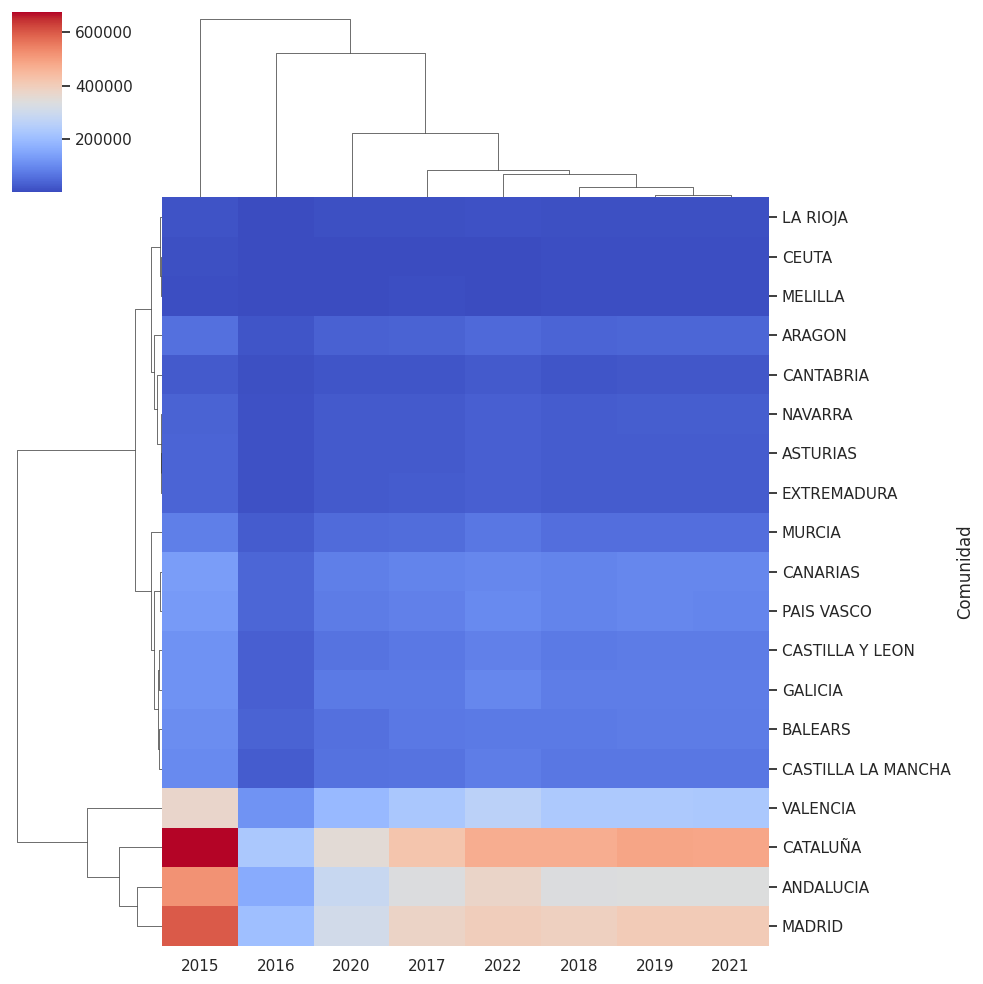

In [ ]:
# Se realiza un heatmap con todas las comunidades y todos los años de estudio del trabajo.

import seaborn as sns
from numpy import transpose
df_clustermap = df_definitivo_clustermap.set_index(['Comunidad'])

sns.set(color_codes=True)
sns.clustermap(df_clustermap, cmap="coolwarm")

In [ ]:
# Tras los resultados anteriores se decide realizar otro dataframe idéntico al anterior peroe sta vez sin tener en cuenta el año 2016 ni el 2020

comu_autonoma = []
año_2017 = []
año_2018 = []
año_2019 = []
año_2020 = []
año_2021 = []
año_2022 = []

comu_autonoma.append("ARAGON")
comu_autonoma.append("ANDALUCIA")
comu_autonoma.append("ASTURIAS")
comu_autonoma.append("BALEARS")
comu_autonoma.append("CANARIAS")
comu_autonoma.append("CANTABRIA")
comu_autonoma.append("CASTILLA LA MANCHA")
comu_autonoma.append("CASTILLA Y LEON")
comu_autonoma.append("CATALUÑA")
comu_autonoma.append("CEUTA")
comu_autonoma.append("MELILLA")
comu_autonoma.append("VALENCIA")
comu_autonoma.append("EXTREMADURA")
comu_autonoma.append("GALICIA")
comu_autonoma.append("MADRID")
comu_autonoma.append("MURCIA")
comu_autonoma.append("NAVARRA")
comu_autonoma.append("PAIS VASCO")
comu_autonoma.append("LA RIOJA")

df_españa_2017_delitos_año = df_definitivo[(df_definitivo['Año']==2017) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2017_delitos_año = df_españa_2017_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2017_delitos_aragon = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2017_delitos_aragon['Cantidad'].astype(int).item()
año_2017.append(aragon_cant)
df_españa_2017_delitos_andalucia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2017_delitos_andalucia['Cantidad'].astype(int).item()
año_2017.append(ancalucia_cant)
df_españa_2017_delitos_asturias = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2017_delitos_asturias['Cantidad'].astype(int).item()
año_2017.append(asturias_cant)
df_españa_2017_delitos_balears = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2017_delitos_balears['Cantidad'].astype(int).item()
año_2017.append(balears_cant)
df_españa_2017_delitos_canarias = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2017_delitos_canarias['Cantidad'].astype(int).item()
año_2017.append(canarias_cant)
df_españa_2017_delitos_cantabria = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2017_delitos_cantabria['Cantidad'].astype(int).item()
año_2017.append(cantabria_cant)
df_españa_2017_delitos_castillamancha = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2017_delitos_castillamancha['Cantidad'].astype(int).item()
año_2017.append(mancha_cant)
df_españa_2017_delitos_castillaleon = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2017_delitos_castillaleon['Cantidad'].astype(int).item()
año_2017.append(leon_cant)
df_españa_2017_delitos_cataluna = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2017_delitos_cataluna['Cantidad'].astype(int).item()
año_2017.append(cataluna_cant)
df_españa_2017_delitos_ceuta = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2017_delitos_ceuta['Cantidad'].astype(int).item()
año_2017.append(ceuta_cant)
df_españa_2017_delitos_melilla = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2017_delitos_melilla['Cantidad'].astype(int).item()
año_2017.append(melilla_cant)
df_españa_2017_delitos_valencia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2017_delitos_valencia['Cantidad'].astype(int).item()
año_2017.append(valencia_cant)
df_españa_2017_delitos_extremadura = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2017_delitos_extremadura['Cantidad'].astype(int).item()
año_2017.append(extremadura_cant)
df_españa_2017_delitos_galicia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2017_delitos_galicia['Cantidad'].astype(int).item()
año_2017.append(galicia_cant)
df_españa_2017_delitos_madrid = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2017_delitos_madrid['Cantidad'].astype(int).item()
año_2017.append(madrid_cant)
df_españa_2017_delitos_murcia = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2017_delitos_murcia['Cantidad'].astype(int).item()
año_2017.append(murcia_cant)
df_españa_2017_delitos_navarra = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2017_delitos_navarra['Cantidad'].astype(int).item()
año_2017.append(navarra_cant)
df_españa_2017_delitos_pvasco = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2017_delitos_pvasco['Cantidad'].astype(int).item()
año_2017.append(pvasco_cant)
df_españa_2017_delitos_rioja = df_españa_2017_delitos_año[df_españa_2017_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2017_delitos_rioja['Cantidad'].astype(int).item()
año_2017.append(rioja_cant)

df_españa_2018_delitos_año = df_definitivo[(df_definitivo['Año']==2018) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2018_delitos_año = df_españa_2018_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2018_delitos_aragon = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2018_delitos_aragon['Cantidad'].astype(int).item()
año_2018.append(aragon_cant)
df_españa_2018_delitos_andalucia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2018_delitos_andalucia['Cantidad'].astype(int).item()
año_2018.append(ancalucia_cant)
df_españa_2018_delitos_asturias = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2018_delitos_asturias['Cantidad'].astype(int).item()
año_2018.append(asturias_cant)
df_españa_2018_delitos_balears = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2018_delitos_balears['Cantidad'].astype(int).item()
año_2018.append(balears_cant)
df_españa_2018_delitos_canarias = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2018_delitos_canarias['Cantidad'].astype(int).item()
año_2018.append(canarias_cant)
df_españa_2018_delitos_cantabria = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2018_delitos_cantabria['Cantidad'].astype(int).item()
año_2018.append(cantabria_cant)
df_españa_2018_delitos_castillamancha = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2018_delitos_castillamancha['Cantidad'].astype(int).item()
año_2018.append(mancha_cant)
df_españa_2018_delitos_castillaleon = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2018_delitos_castillaleon['Cantidad'].astype(int).item()
año_2018.append(leon_cant)
df_españa_2018_delitos_cataluna = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2018_delitos_cataluna['Cantidad'].astype(int).item()
año_2018.append(cataluna_cant)
df_españa_2018_delitos_ceuta = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2018_delitos_ceuta['Cantidad'].astype(int).item()
año_2018.append(ceuta_cant)
df_españa_2018_delitos_melilla = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2018_delitos_melilla['Cantidad'].astype(int).item()
año_2018.append(melilla_cant)
df_españa_2018_delitos_valencia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2018_delitos_valencia['Cantidad'].astype(int).item()
año_2018.append(valencia_cant)
df_españa_2018_delitos_extremadura = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2018_delitos_extremadura['Cantidad'].astype(int).item()
año_2018.append(extremadura_cant)
df_españa_2018_delitos_galicia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2018_delitos_galicia['Cantidad'].astype(int).item()
año_2018.append(galicia_cant)
df_españa_2018_delitos_madrid = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2018_delitos_madrid['Cantidad'].astype(int).item()
año_2018.append(madrid_cant)
df_españa_2018_delitos_murcia = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2018_delitos_murcia['Cantidad'].astype(int).item()
año_2018.append(murcia_cant)
df_españa_2018_delitos_navarra = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2018_delitos_navarra['Cantidad'].astype(int).item()
año_2018.append(navarra_cant)
df_españa_2018_delitos_pvasco = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2018_delitos_pvasco['Cantidad'].astype(int).item()
año_2018.append(pvasco_cant)
df_españa_2018_delitos_rioja = df_españa_2018_delitos_año[df_españa_2018_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2018_delitos_rioja['Cantidad'].astype(int).item()
año_2018.append(rioja_cant)

df_españa_2019_delitos_año = df_definitivo[(df_definitivo['Año']==2019) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2019_delitos_año = df_españa_2019_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2019_delitos_aragon = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2019_delitos_aragon['Cantidad'].astype(int).item()
año_2019.append(aragon_cant)
df_españa_2019_delitos_andalucia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2019_delitos_andalucia['Cantidad'].astype(int).item()
año_2019.append(ancalucia_cant)
df_españa_2019_delitos_asturias = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2019_delitos_asturias['Cantidad'].astype(int).item()
año_2019.append(asturias_cant)
df_españa_2019_delitos_balears = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2019_delitos_balears['Cantidad'].astype(int).item()
año_2019.append(balears_cant)
df_españa_2019_delitos_canarias = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2019_delitos_canarias['Cantidad'].astype(int).item()
año_2019.append(canarias_cant)
df_españa_2019_delitos_cantabria = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2019_delitos_cantabria['Cantidad'].astype(int).item()
año_2019.append(cantabria_cant)
df_españa_2019_delitos_castillamancha = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2019_delitos_castillamancha['Cantidad'].astype(int).item()
año_2019.append(mancha_cant)
df_españa_2019_delitos_castillaleon = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2019_delitos_castillaleon['Cantidad'].astype(int).item()
año_2019.append(leon_cant)
df_españa_2019_delitos_cataluna = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2019_delitos_cataluna['Cantidad'].astype(int).item()
año_2019.append(cataluna_cant)
df_españa_2019_delitos_ceuta = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2019_delitos_ceuta['Cantidad'].astype(int).item()
año_2019.append(ceuta_cant)
df_españa_2019_delitos_melilla = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2019_delitos_melilla['Cantidad'].astype(int).item()
año_2019.append(melilla_cant)
df_españa_2019_delitos_valencia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2019_delitos_valencia['Cantidad'].astype(int).item()
año_2019.append(valencia_cant)
df_españa_2019_delitos_extremadura = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2019_delitos_extremadura['Cantidad'].astype(int).item()
año_2019.append(extremadura_cant)
df_españa_2019_delitos_galicia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2019_delitos_galicia['Cantidad'].astype(int).item()
año_2019.append(galicia_cant)
df_españa_2019_delitos_madrid = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2019_delitos_madrid['Cantidad'].astype(int).item()
año_2019.append(madrid_cant)
df_españa_2019_delitos_murcia = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2019_delitos_murcia['Cantidad'].astype(int).item()
año_2019.append(murcia_cant)
df_españa_2019_delitos_navarra = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2019_delitos_navarra['Cantidad'].astype(int).item()
año_2019.append(navarra_cant)
df_españa_2019_delitos_pvasco = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2019_delitos_pvasco['Cantidad'].astype(int).item()
año_2019.append(pvasco_cant)
df_españa_2019_delitos_rioja = df_españa_2019_delitos_año[df_españa_2019_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2019_delitos_rioja['Cantidad'].astype(int).item()
año_2019.append(rioja_cant)

df_españa_2020_delitos_año = df_definitivo[(df_definitivo['Año']==2020) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2020_delitos_año = df_españa_2020_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2020_delitos_aragon = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2020_delitos_aragon['Cantidad'].astype(int).item()
año_2020.append(aragon_cant)
df_españa_2020_delitos_andalucia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2020_delitos_andalucia['Cantidad'].astype(int).item()
año_2020.append(ancalucia_cant)
df_españa_2020_delitos_asturias = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2020_delitos_asturias['Cantidad'].astype(int).item()
año_2020.append(asturias_cant)
df_españa_2020_delitos_balears = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2020_delitos_balears['Cantidad'].astype(int).item()
año_2020.append(balears_cant)
df_españa_2020_delitos_canarias = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2020_delitos_canarias['Cantidad'].astype(int).item()
año_2020.append(canarias_cant)
df_españa_2020_delitos_cantabria = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2020_delitos_cantabria['Cantidad'].astype(int).item()
año_2020.append(cantabria_cant)
df_españa_2020_delitos_castillamancha = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2020_delitos_castillamancha['Cantidad'].astype(int).item()
año_2020.append(mancha_cant)
df_españa_2020_delitos_castillaleon = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2020_delitos_castillaleon['Cantidad'].astype(int).item()
año_2020.append(leon_cant)
df_españa_2020_delitos_cataluna = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2020_delitos_cataluna['Cantidad'].astype(int).item()
año_2020.append(cataluna_cant)
df_españa_2020_delitos_ceuta = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2020_delitos_ceuta['Cantidad'].astype(int).item()
año_2020.append(ceuta_cant)
df_españa_2020_delitos_melilla = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2020_delitos_melilla['Cantidad'].astype(int).item()
año_2020.append(melilla_cant)
df_españa_2020_delitos_valencia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2020_delitos_valencia['Cantidad'].astype(int).item()
año_2020.append(valencia_cant)
df_españa_2020_delitos_extremadura = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2020_delitos_extremadura['Cantidad'].astype(int).item()
año_2020.append(extremadura_cant)
df_españa_2020_delitos_galicia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2020_delitos_galicia['Cantidad'].astype(int).item()
año_2020.append(galicia_cant)
df_españa_2020_delitos_madrid = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2020_delitos_madrid['Cantidad'].astype(int).item()
año_2020.append(madrid_cant)
df_españa_2020_delitos_murcia = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2020_delitos_murcia['Cantidad'].astype(int).item()
año_2020.append(murcia_cant)
df_españa_2020_delitos_navarra = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2020_delitos_navarra['Cantidad'].astype(int).item()
año_2020.append(navarra_cant)
df_españa_2020_delitos_pvasco = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2020_delitos_pvasco['Cantidad'].astype(int).item()
año_2020.append(pvasco_cant)
df_españa_2020_delitos_rioja = df_españa_2020_delitos_año[df_españa_2020_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2020_delitos_rioja['Cantidad'].astype(int).item()
año_2020.append(rioja_cant)

df_españa_2021_delitos_año = df_definitivo[(df_definitivo['Año']==2021) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2021_delitos_año = df_españa_2021_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2021_delitos_aragon = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2021_delitos_aragon['Cantidad'].astype(int).item()
año_2021.append(aragon_cant)
df_españa_2021_delitos_andalucia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2021_delitos_andalucia['Cantidad'].astype(int).item()
año_2021.append(ancalucia_cant)
df_españa_2021_delitos_asturias = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2021_delitos_asturias['Cantidad'].astype(int).item()
año_2021.append(asturias_cant)
df_españa_2021_delitos_balears = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2021_delitos_balears['Cantidad'].astype(int).item()
año_2021.append(balears_cant)
df_españa_2021_delitos_canarias = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2021_delitos_canarias['Cantidad'].astype(int).item()
año_2021.append(canarias_cant)
df_españa_2021_delitos_cantabria = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2021_delitos_cantabria['Cantidad'].astype(int).item()
año_2021.append(cantabria_cant)
df_españa_2021_delitos_castillamancha = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2021_delitos_castillamancha['Cantidad'].astype(int).item()
año_2021.append(mancha_cant)
df_españa_2021_delitos_castillaleon = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2021_delitos_castillaleon['Cantidad'].astype(int).item()
año_2021.append(leon_cant)
df_españa_2021_delitos_cataluna = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2021_delitos_cataluna['Cantidad'].astype(int).item()
año_2021.append(cataluna_cant)
df_españa_2021_delitos_ceuta = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2021_delitos_ceuta['Cantidad'].astype(int).item()
año_2021.append(ceuta_cant)
df_españa_2021_delitos_melilla = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2021_delitos_melilla['Cantidad'].astype(int).item()
año_2021.append(melilla_cant)
df_españa_2021_delitos_valencia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2021_delitos_valencia['Cantidad'].astype(int).item()
año_2021.append(valencia_cant)
df_españa_2021_delitos_extremadura = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2021_delitos_extremadura['Cantidad'].astype(int).item()
año_2021.append(extremadura_cant)
df_españa_2021_delitos_galicia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2021_delitos_galicia['Cantidad'].astype(int).item()
año_2021.append(galicia_cant)
df_españa_2021_delitos_madrid = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2021_delitos_madrid['Cantidad'].astype(int).item()
año_2021.append(madrid_cant)
df_españa_2021_delitos_murcia = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2021_delitos_murcia['Cantidad'].astype(int).item()
año_2021.append(murcia_cant)
df_españa_2021_delitos_navarra = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2021_delitos_navarra['Cantidad'].astype(int).item()
año_2021.append(navarra_cant)
df_españa_2021_delitos_pvasco = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2021_delitos_pvasco['Cantidad'].astype(int).item()
año_2021.append(pvasco_cant)
df_españa_2021_delitos_rioja = df_españa_2021_delitos_año[df_españa_2021_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2021_delitos_rioja['Cantidad'].astype(int).item()
año_2021.append(rioja_cant)

df_españa_2022_delitos_año = df_definitivo[(df_definitivo['Año']==2022) & (df_definitivo['Trimestre']==4) & (df_definitivo['Comunidad']!='TOTAL NACIONAL')]
df_españa_2022_delitos_año = df_españa_2022_delitos_año.groupby(['Año', 'Comunidad'])['Cantidad'].sum().reset_index()

df_españa_2022_delitos_aragon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ARAGON']
aragon_cant = df_españa_2022_delitos_aragon['Cantidad'].astype(int).item()
año_2022.append(aragon_cant)
df_españa_2022_delitos_andalucia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ANDALUCIA']
ancalucia_cant = df_españa_2022_delitos_andalucia['Cantidad'].astype(int).item()
año_2022.append(ancalucia_cant)
df_españa_2022_delitos_asturias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'ASTURIAS (PRINCIPADO DE)']
asturias_cant = df_españa_2022_delitos_asturias['Cantidad'].astype(int).item()
año_2022.append(asturias_cant)
df_españa_2022_delitos_balears = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'BALEARS (ILLES)']
balears_cant = df_españa_2022_delitos_balears['Cantidad'].astype(int).item()
año_2022.append(balears_cant)
df_españa_2022_delitos_canarias = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANARIAS']
canarias_cant = df_españa_2022_delitos_canarias['Cantidad'].astype(int).item()
año_2022.append(canarias_cant)
df_españa_2022_delitos_cantabria = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CANTABRIA']
cantabria_cant = df_españa_2022_delitos_cantabria['Cantidad'].astype(int).item()
año_2022.append(cantabria_cant)
df_españa_2022_delitos_castillamancha = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA - LA MANCHA']
mancha_cant = df_españa_2022_delitos_castillamancha['Cantidad'].astype(int).item()
año_2022.append(mancha_cant)
df_españa_2022_delitos_castillaleon = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CASTILLA Y LEON']
leon_cant = df_españa_2022_delitos_castillaleon['Cantidad'].astype(int).item()
año_2022.append(leon_cant)
df_españa_2022_delitos_cataluna = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CATALUNA']
cataluna_cant = df_españa_2022_delitos_cataluna['Cantidad'].astype(int).item()
año_2022.append(cataluna_cant)
df_españa_2022_delitos_ceuta = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE CEUTA']
ceuta_cant = df_españa_2022_delitos_ceuta['Cantidad'].astype(int).item()
año_2022.append(ceuta_cant)
df_españa_2022_delitos_melilla = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'CIUDAD AUTONOMA DE MELILLA']
melilla_cant = df_españa_2022_delitos_melilla['Cantidad'].astype(int).item()
año_2022.append(melilla_cant)
df_españa_2022_delitos_valencia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'COMUNITAT VALENCIANA']
valencia_cant = df_españa_2022_delitos_valencia['Cantidad'].astype(int).item()
año_2022.append(valencia_cant)
df_españa_2022_delitos_extremadura = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'EXTREMADURA']
extremadura_cant = df_españa_2022_delitos_extremadura['Cantidad'].astype(int).item()
año_2022.append(extremadura_cant)
df_españa_2022_delitos_galicia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'GALICIA']
galicia_cant = df_españa_2022_delitos_galicia['Cantidad'].astype(int).item()
año_2022.append(galicia_cant)
df_españa_2022_delitos_madrid = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MADRID (COMUNIDAD DE)']
madrid_cant = df_españa_2022_delitos_madrid['Cantidad'].astype(int).item()
año_2022.append(madrid_cant)
df_españa_2022_delitos_murcia = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'MURCIA (REGION DE)']
murcia_cant = df_españa_2022_delitos_murcia['Cantidad'].astype(int).item()
año_2022.append(murcia_cant)
df_españa_2022_delitos_navarra = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'NAVARRA (COMUNIDAD FORAL DE)']
navarra_cant = df_españa_2022_delitos_navarra['Cantidad'].astype(int).item()
año_2022.append(navarra_cant)
df_españa_2022_delitos_pvasco = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'PAIS VASCO']
pvasco_cant = df_españa_2022_delitos_pvasco['Cantidad'].astype(int).item()
año_2022.append(pvasco_cant)
df_españa_2022_delitos_rioja = df_españa_2022_delitos_año[df_españa_2022_delitos_año['Comunidad'] == 'RIOJA (LA)']
rioja_cant = df_españa_2022_delitos_rioja['Cantidad'].astype(int).item()
año_2022.append(rioja_cant)

df_definitivo_clustermap = pd.DataFrame({
    'Comunidad': comu_autonoma,
    '2017': año_2017,
    '2018': año_2018,
    '2019': año_2019,
    '2020': año_2020,
    '2021': año_2021,
    '2022': año_2022,
})

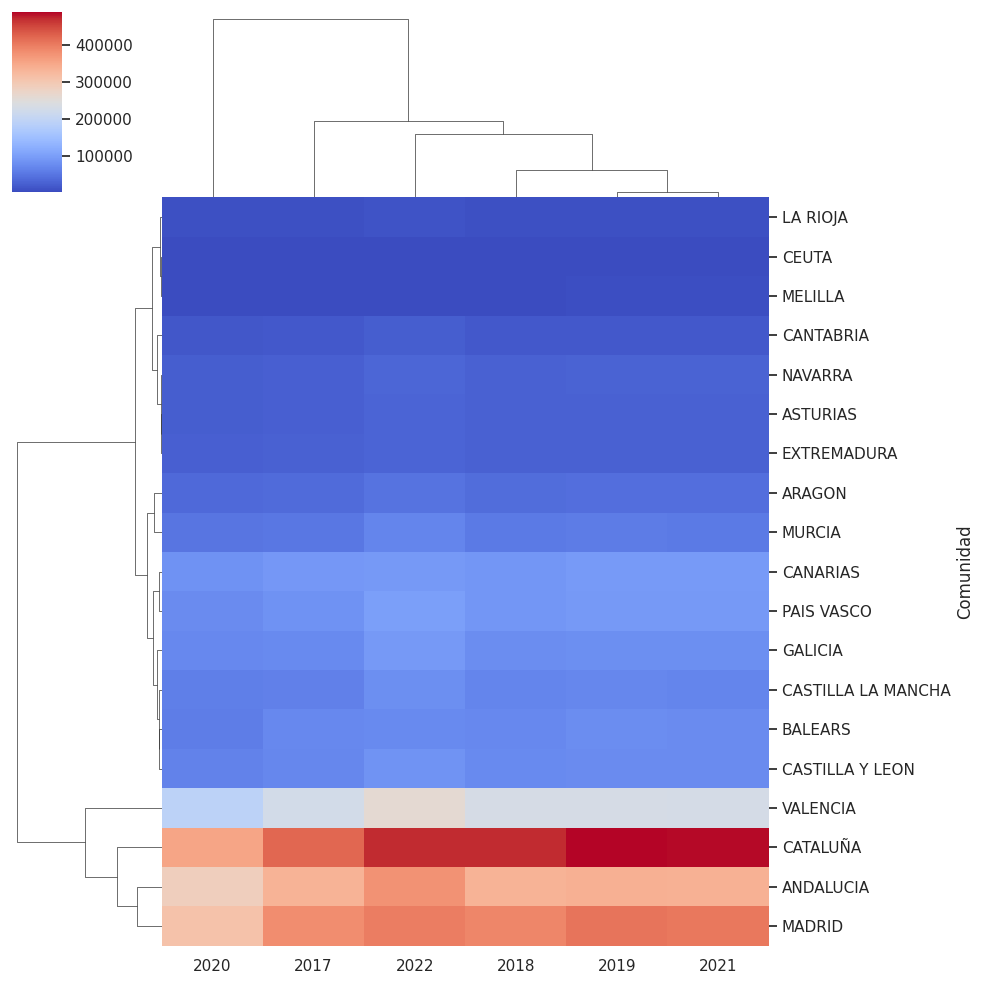

In [ ]:
# Una vez construído el dataframe se realiza el clustermap sin el año 2016 ni el 2020, pero sí con todas las comunidades autónomas.

import seaborn as sns
from numpy import transpose
df_clustermap = df_definitivo_clustermap.set_index(['Comunidad'])

sns.set(color_codes=True)
sns.clustermap(df_clustermap, cmap="coolwarm")